In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
income=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
income.isnull().sum()   ## here is  no null value in data set

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
income.shape

(32560, 15)

In [6]:
income.info()   ##  we have 9 object or 6 int value in data and shape of our data is 32560,15.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
income.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
income.isin(["?"]).sum()   ### check any space value 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
### here we are see data are fill all values no null value and no  wrong entry inthis data.

In [10]:
income.duplicated().sum()

24

In [11]:
income=income.dropna()

In [12]:
income.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
7790,19,Private,165310,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Male,0,0,20,United-States,<=50K
12774,28,Private,48894,HS-grad,9,Married-civ-spouse,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
20082,56,Local-gov,170217,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
2659,48,Private,108993,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K
13124,66,Private,142624,Assoc-acdm,12,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5556,0,40,Yugoslavia,>50K


# Lets seprate the categorical and numerical feature.

In [13]:
cat_feature=income.select_dtypes(include=[np.object_])

In [14]:
cat_feature.head(5)

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


# EDA

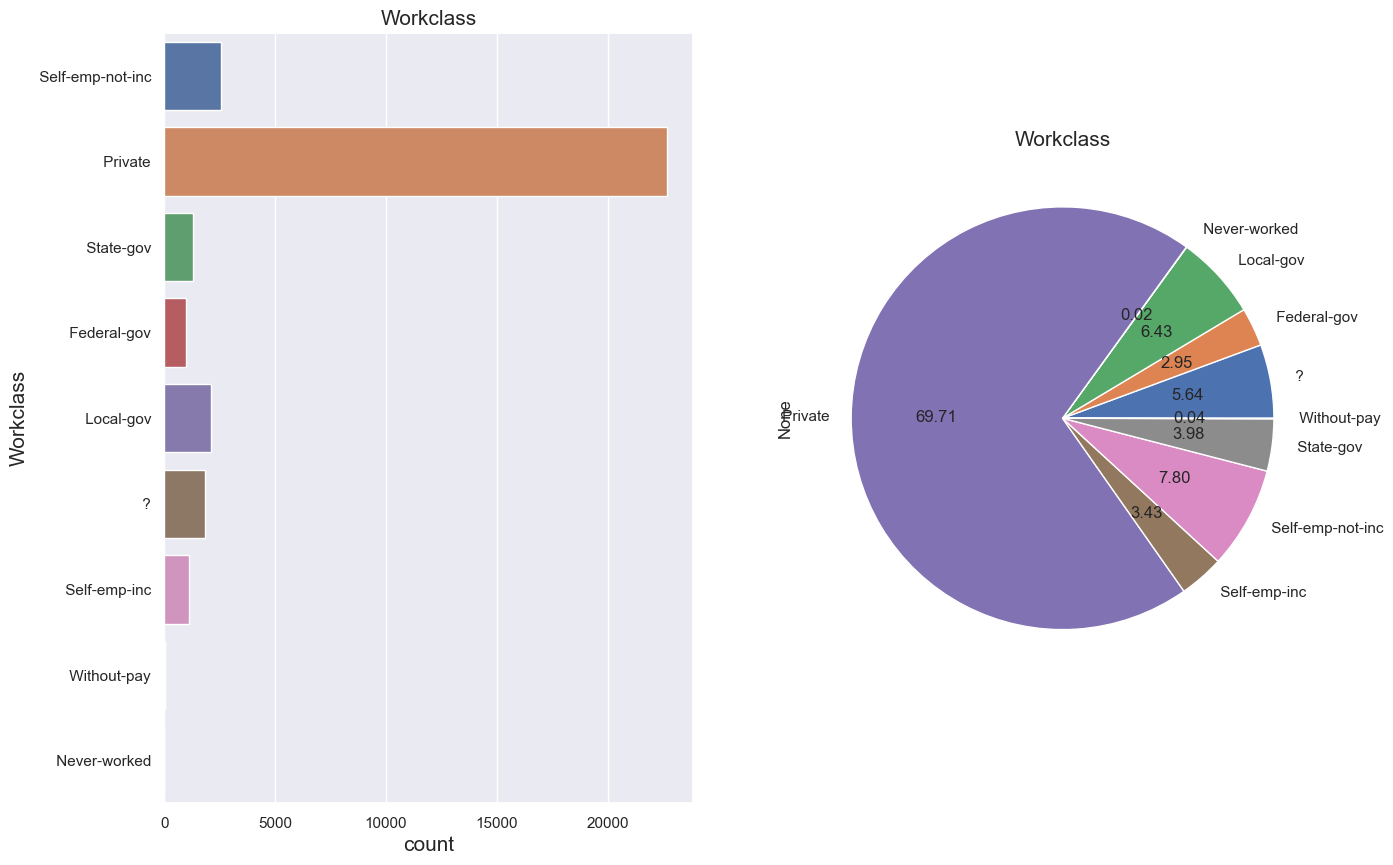

In [15]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(y=cat_feature['Workclass'])
plt.ylabel('Workclass', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.title('Workclass', fontsize=15)
plt.subplot(1,2,2)
cat_feature.groupby('Workclass').size().plot(kind='pie', autopct='%.2f')
plt.title('Workclass', fontsize=15)
plt.show()

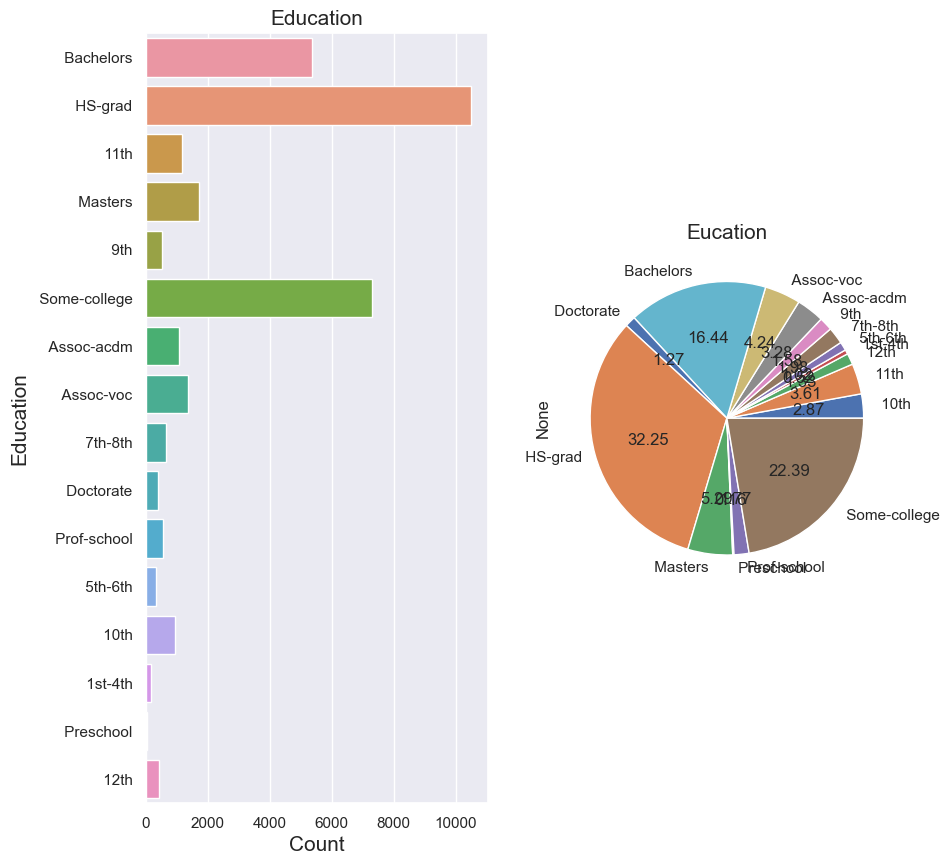

In [16]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,10))
plt.subplot(1,3,2)
sns.countplot(y=cat_feature['Education'])
plt.xlabel('Count', fontsize=15)
plt.ylabel('Education', fontsize=15)
plt.title('Education', fontsize=15)
plt.subplot(1,3,3)
cat_feature.groupby('Education').size().plot(kind='pie', autopct='%.2f')
plt.title('Eucation', fontsize=15)
plt.show()

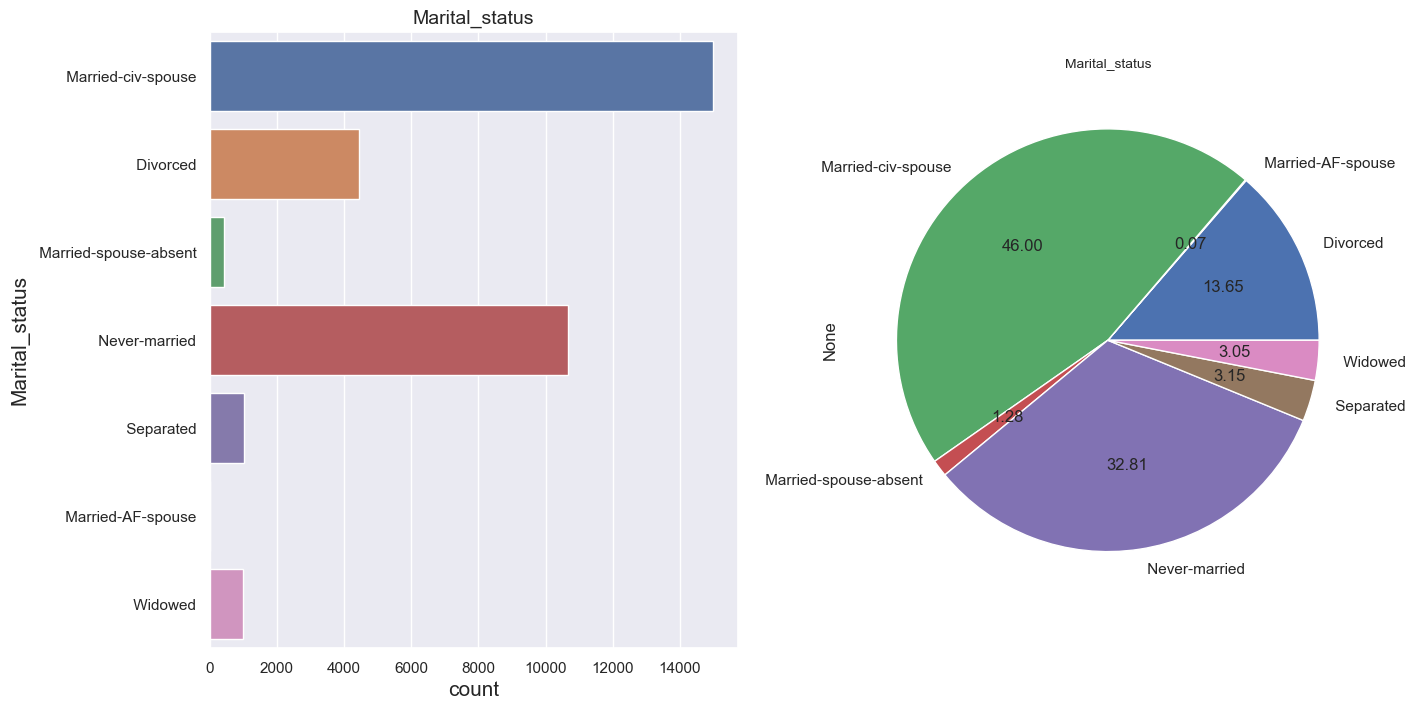

In [17]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=cat_feature['Marital_status'])
plt.ylabel('Marital_status', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.title('Marital_status', fontsize=14)
plt.subplot(1,2,2)
cat_feature.groupby('Marital_status').size().plot(kind='pie', autopct='%.2f')
plt.title('Marital_status', fontsize=10)
plt.show()

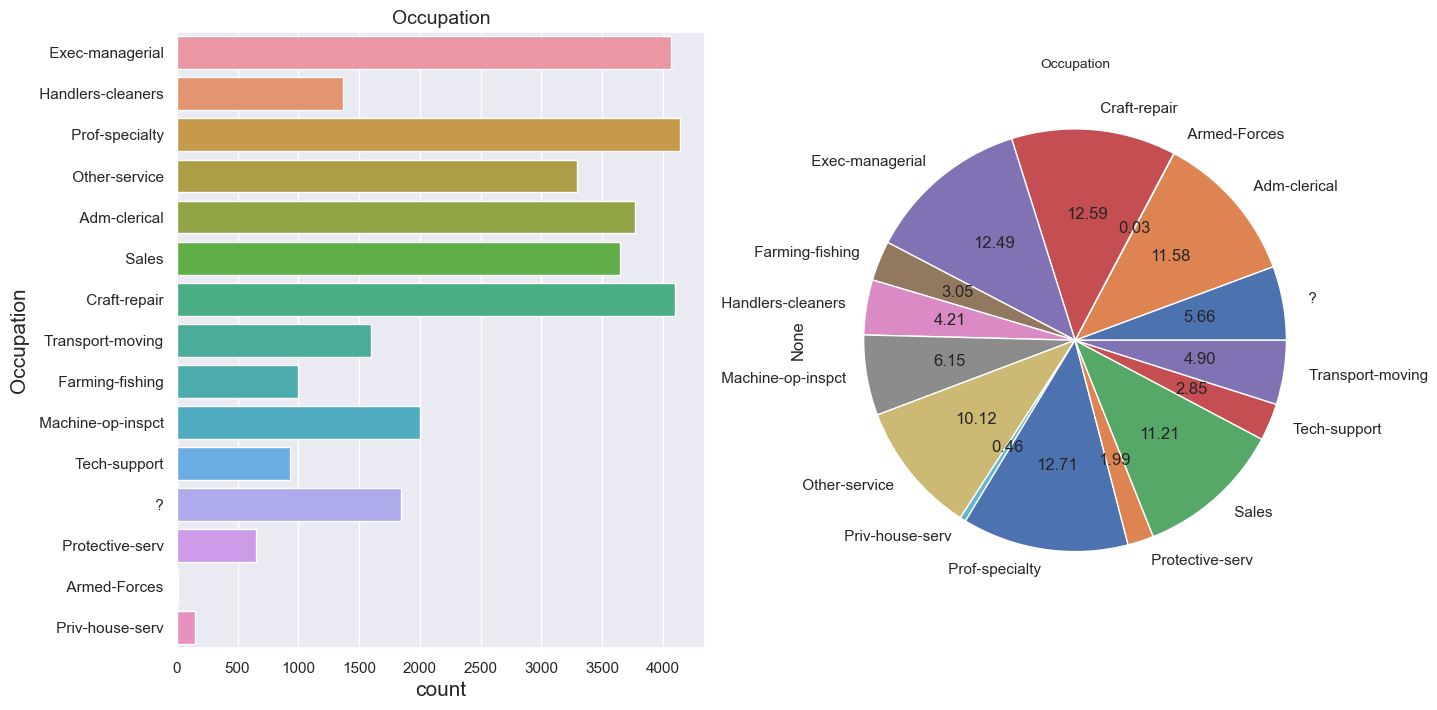

In [18]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=cat_feature['Occupation'])
plt.ylabel('Occupation', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.title('Occupation', fontsize=14)
plt.subplot(1,2,2)
cat_feature.groupby('Occupation').size().plot(kind='pie', autopct='%.2f')
plt.title('Occupation',fontsize=10)
plt.show()

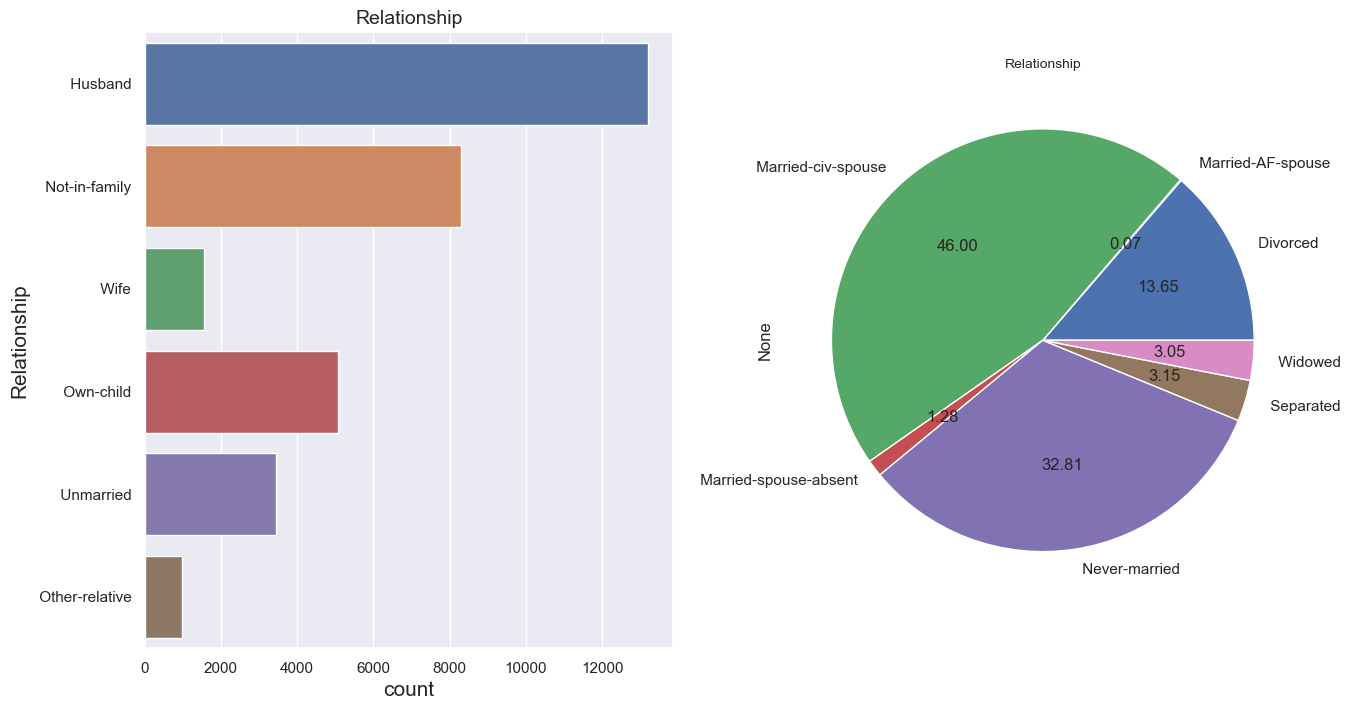

In [19]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=cat_feature['Relationship'])
plt.ylabel('Relationship', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.title('Relationship', fontsize=14)
plt.subplot(1,2,2)
cat_feature.groupby('Marital_status').size().plot(kind='pie', autopct='%.2f')
plt.title('Relationship', fontsize=10)
plt.show()

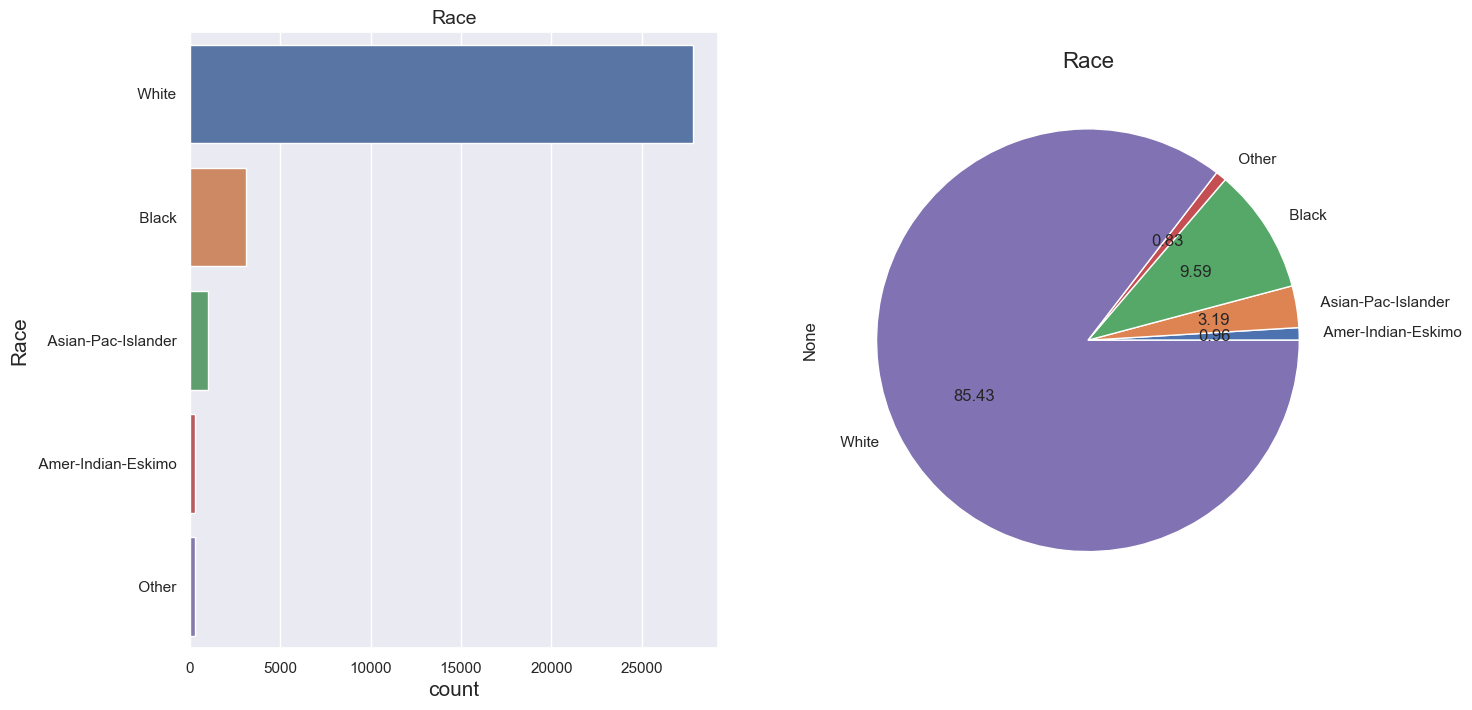

In [20]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=cat_feature['Race'])
plt.ylabel('Race', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.title('Race', fontsize=14)
plt.subplot(1,2,2)
cat_feature.groupby('Race').size().plot(kind='pie', autopct='%.2f')
plt.title('Race', fontsize=16)
plt.show()

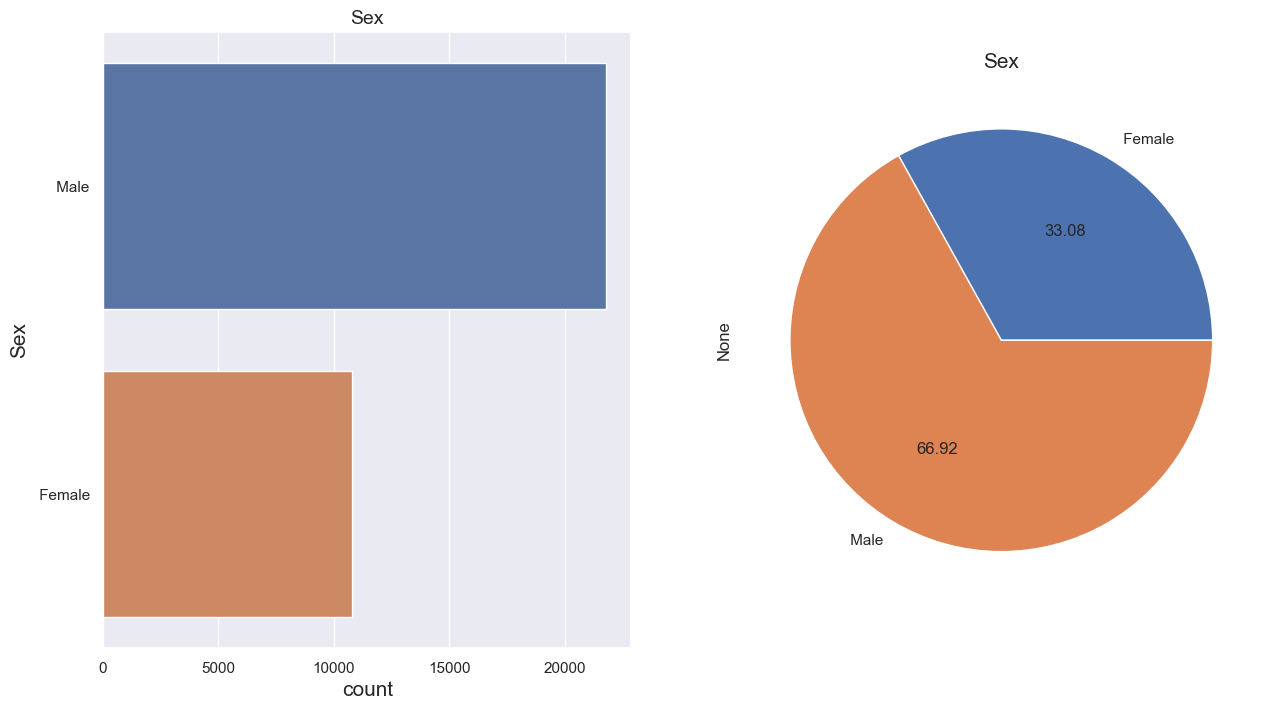

In [21]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=cat_feature['Sex'])
plt.ylabel('Sex', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.title('Sex', fontsize=14)
plt.subplot(1,2,2)
cat_feature.groupby('Sex').size().plot(kind='pie', autopct='%.2f')
plt.title('Sex',fontsize=15)
plt.show()

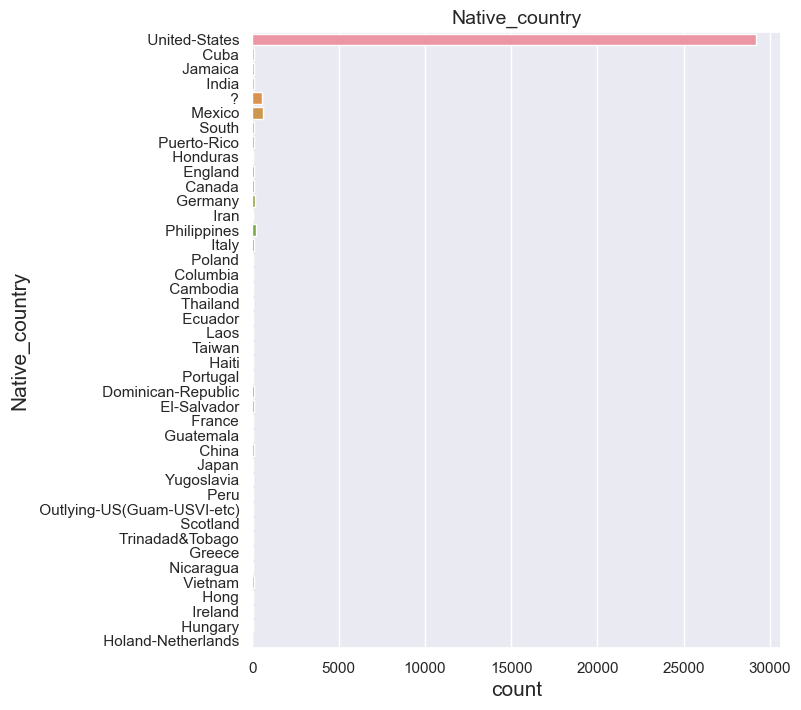

In [22]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=cat_feature['Native_country'])
plt.ylabel('Native_country', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.title('Native_country', fontsize=14)

plt.show()

Text(0.5, 1.0, 'Income')

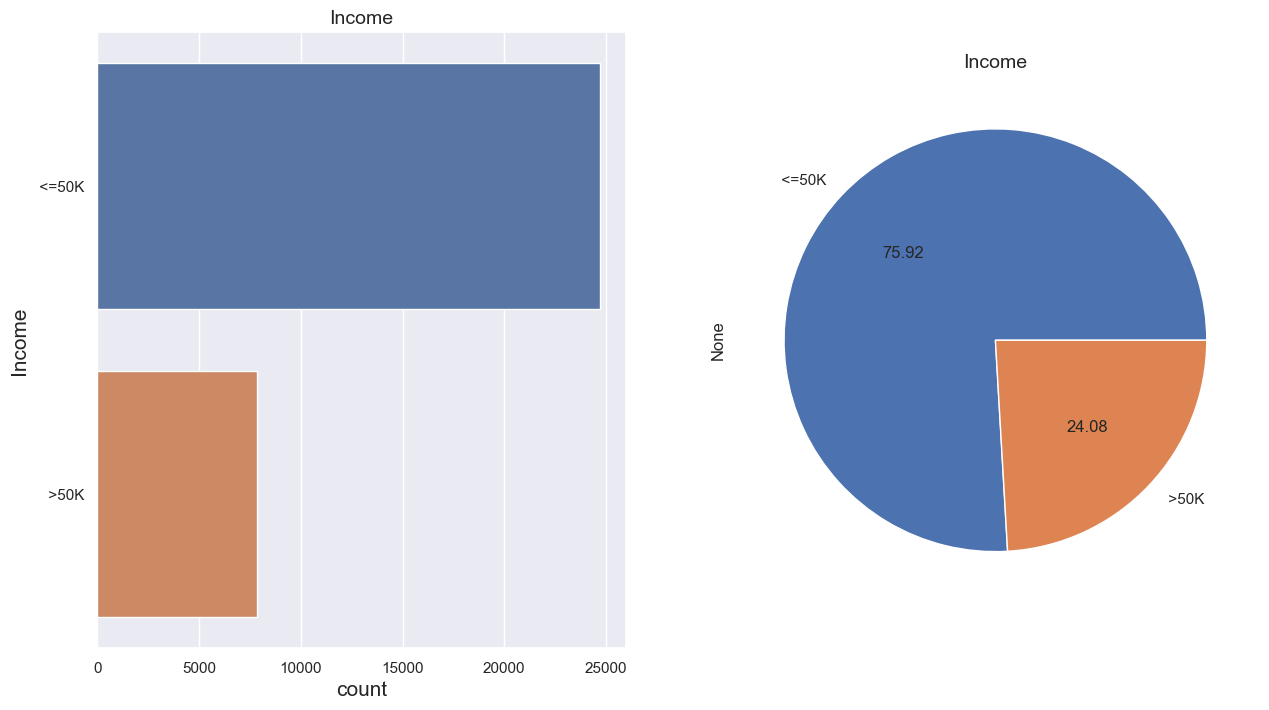

In [23]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=cat_feature['Income'])
plt.ylabel('Income', fontsize=15)
plt.xlabel('count', fontsize=15)
plt.title('Income', fontsize=14)
plt.subplot(1,2,2)
cat_feature.groupby('Income').size().plot(kind='pie', autopct='%.2f')
plt.title('Income', fontsize=14)

In [24]:
## Our target column having a very good information. 75.92% people having the <=50K, only 24.08% people having
## >=50K of income.

In [25]:
num_feature=income.select_dtypes(include=[np.number])

In [26]:
num_feature.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


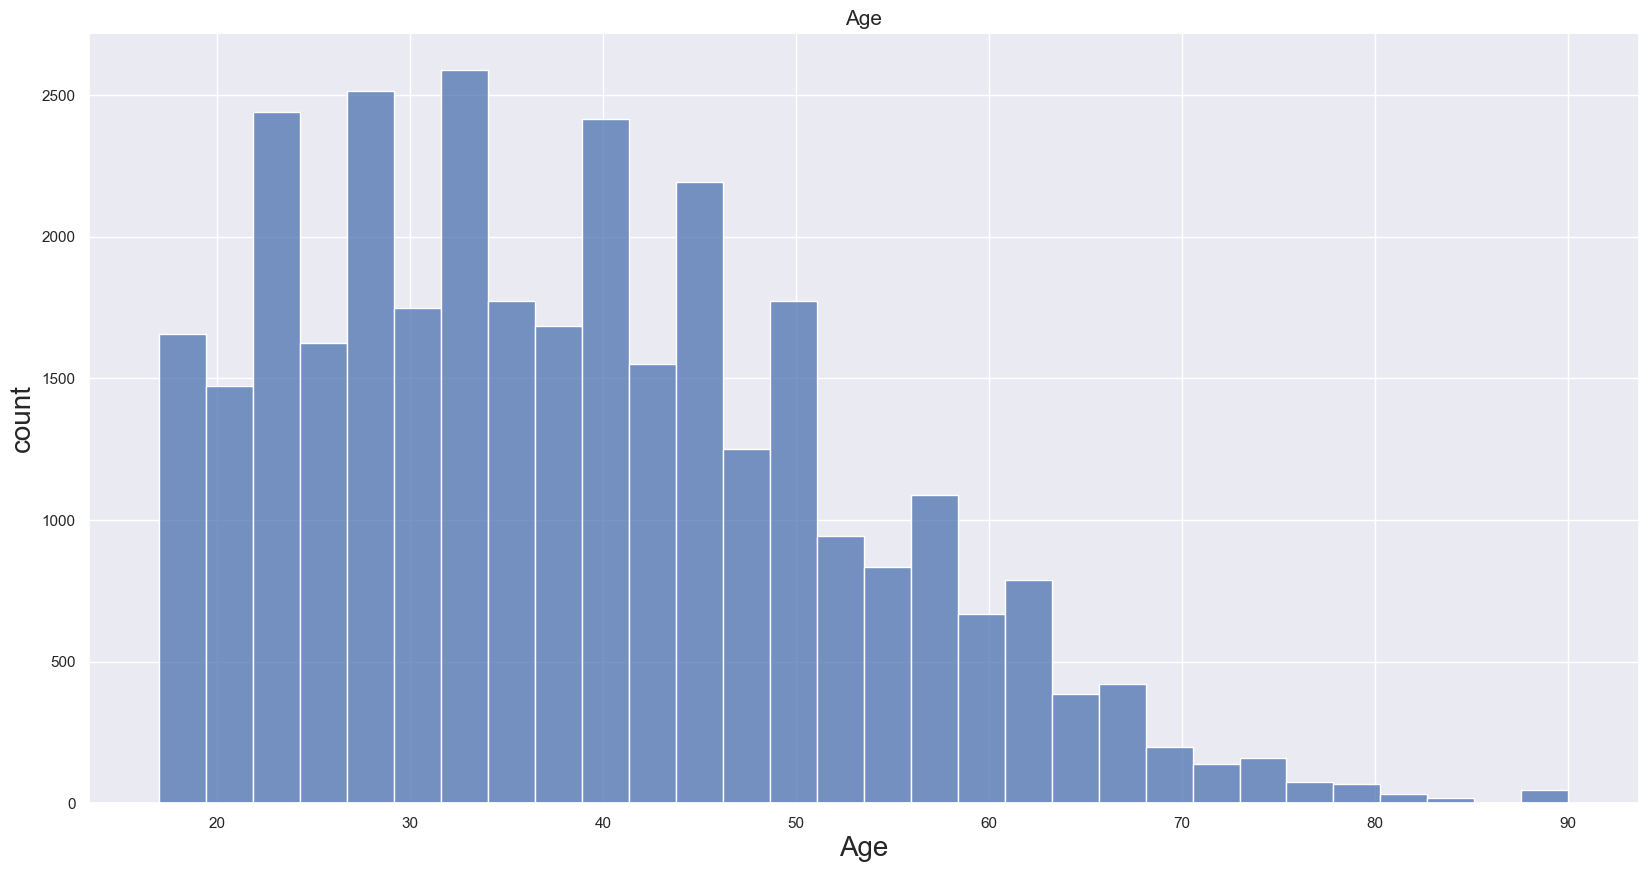

In [27]:
plt.figure(figsize=(20,10))
sns.histplot(num_feature['Age'], bins=30)
plt.xlabel('Age', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Age', fontsize=15)
plt.show()

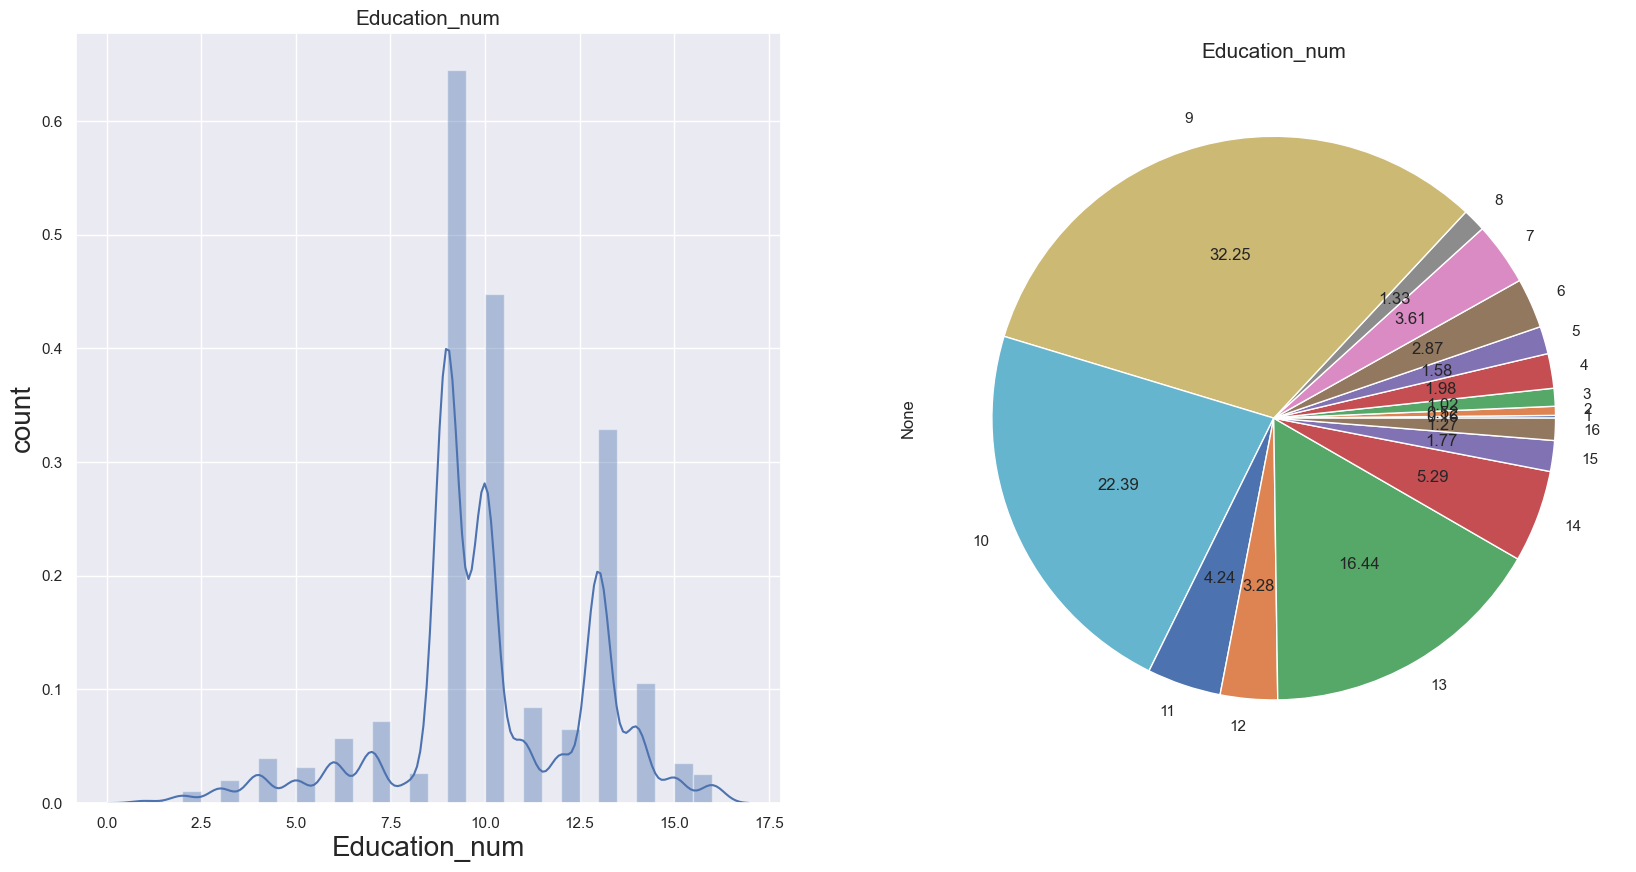

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(num_feature['Education_num'], bins=30)
plt.xlabel('Education_num', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Education_num', fontsize=15)
plt.subplot(1,2,2)
num_feature.groupby('Education_num').size().plot(kind='pie', autopct='%.2f')
plt.title('Education_num', fontsize=15)         
plt.show()

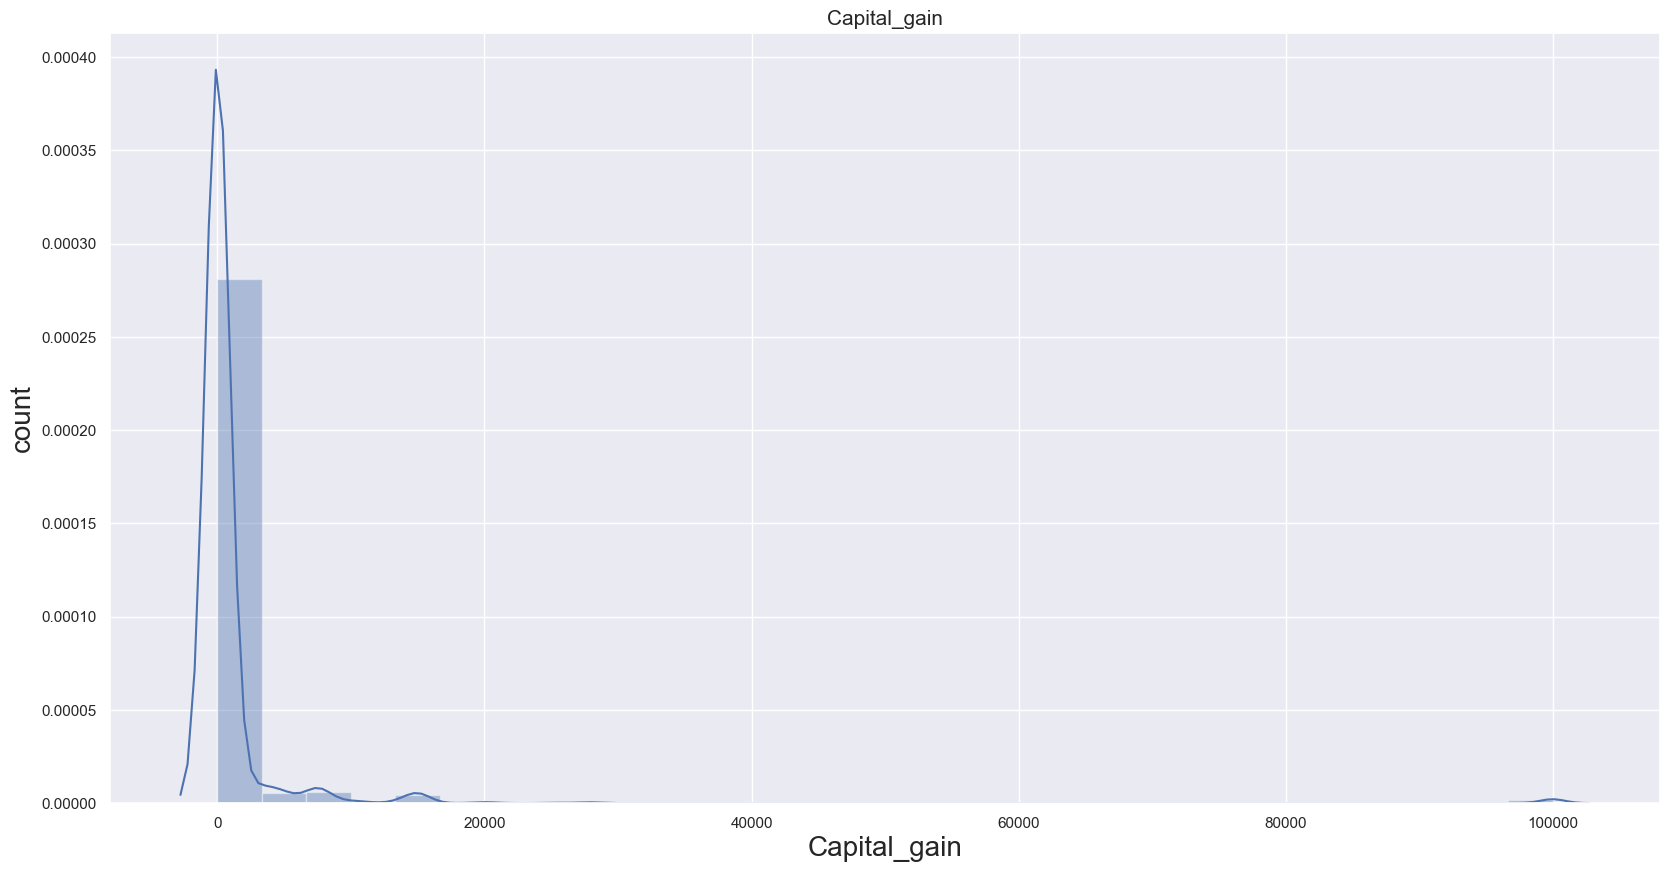

In [29]:
plt.figure(figsize=(20,10))

sns.distplot(num_feature['Capital_gain'], bins=30)
plt.xlabel('Capital_gain', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Capital_gain', fontsize=15)

plt.show()

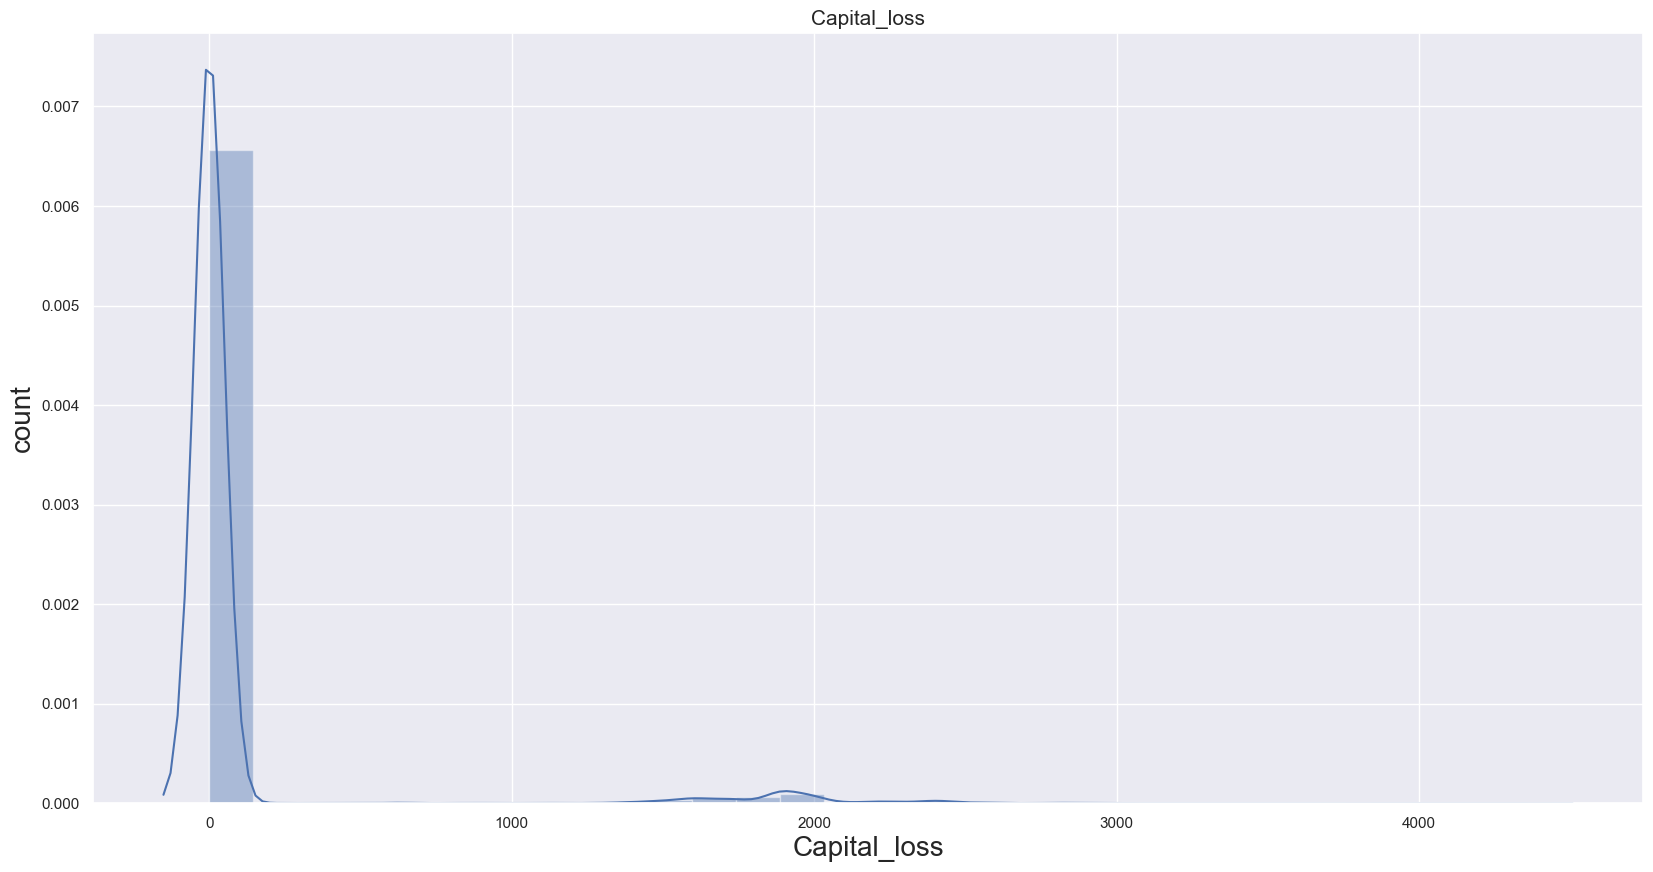

In [30]:
plt.figure(figsize=(20,10))

sns.distplot(num_feature['Capital_loss'], bins=30)
plt.xlabel('Capital_loss', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Capital_loss', fontsize=15)

plt.show()

In [31]:
 ## In our data capital_gain or capital low  at '0 is very bbigh that means it have the skewness in data'

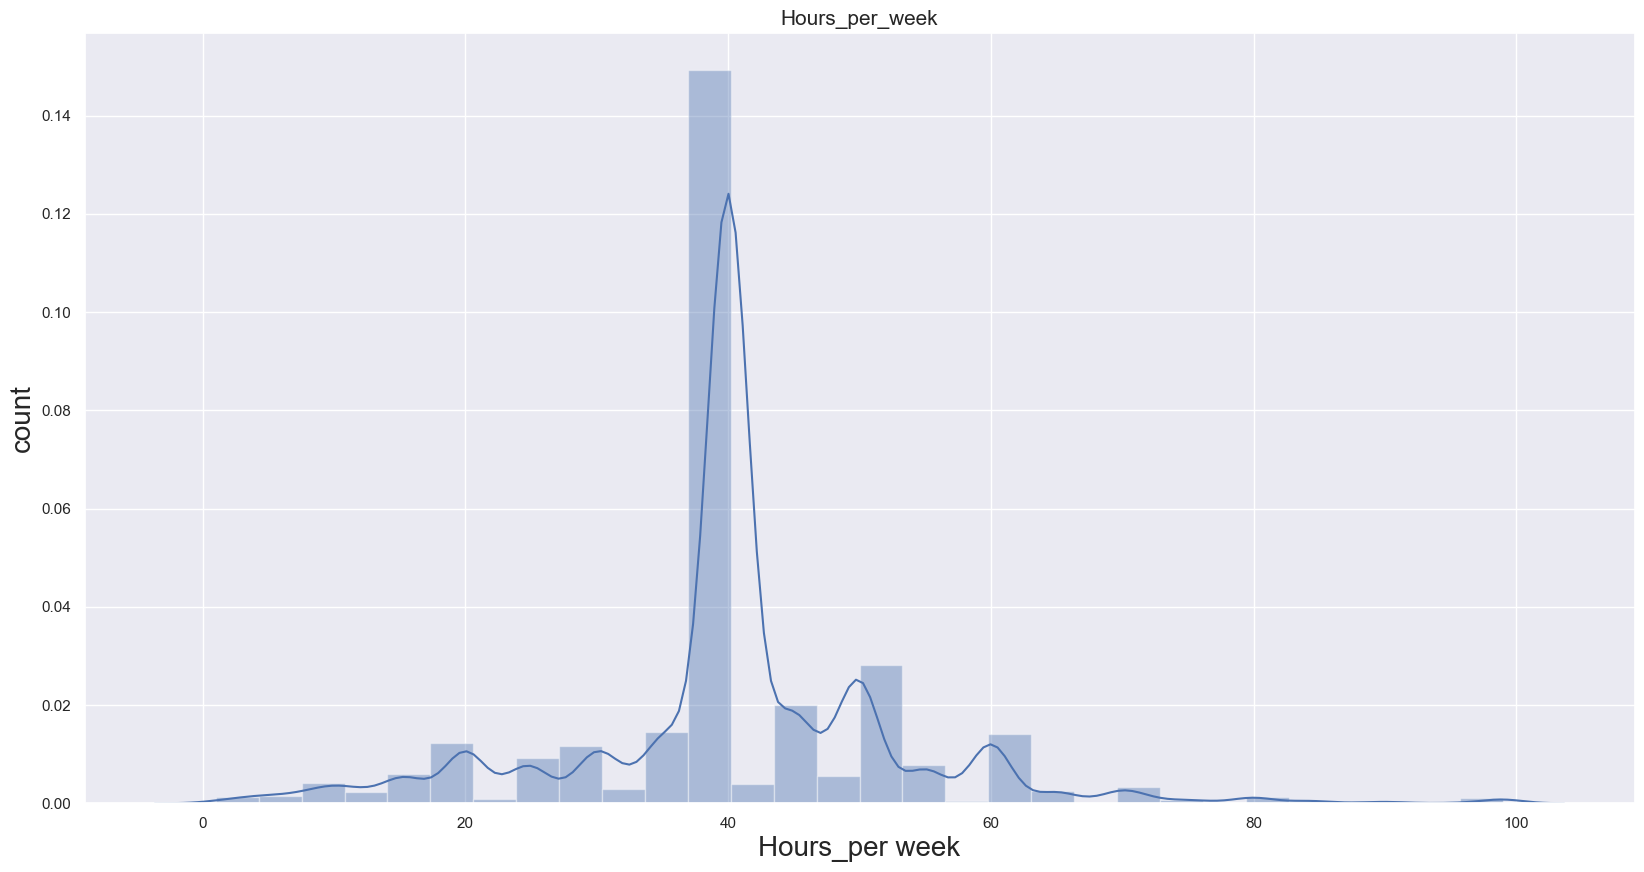

In [32]:
plt.figure(figsize=(20,10))

sns.distplot(num_feature['Hours_per_week'], bins=30)
plt.xlabel('Hours_per week', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Hours_per_week', fontsize=15)

plt.show()

In [33]:
### here probability 40% is high.

# Bivariate Analysis.
here we will check  feature how much will effect  our target.

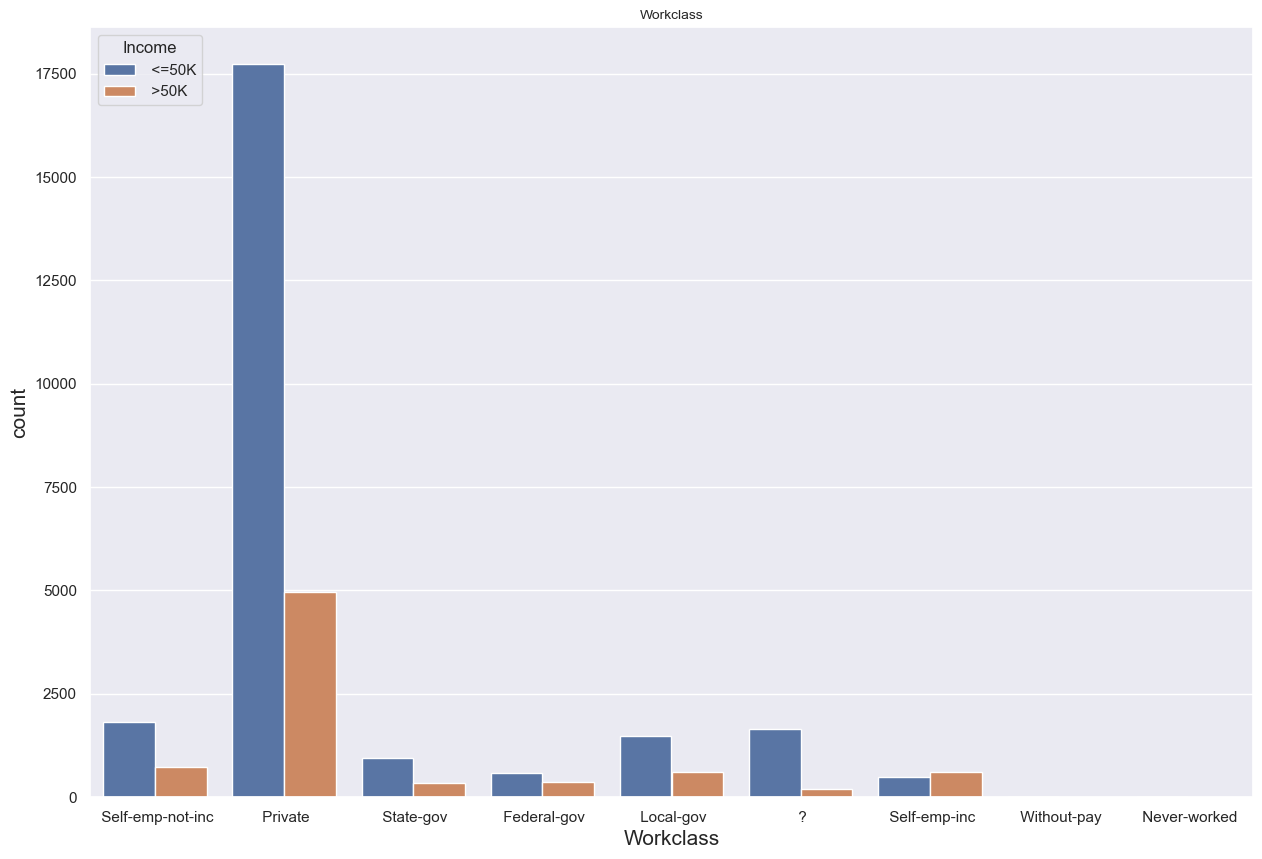

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(income['Workclass'], hue='Income', data=income)
plt.xlabel('Workclass', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('Workclass', fontsize=10)
plt.show()

In [35]:
 pd.crosstab(income['Income'], income['Workclass'])

Workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Income,,,,,,,,,
<=50K,1645,589,1476,7,17733,494,1817,944,14
>50K,191,371,617,0,4963,622,724,353,0


In [36]:
## In above data we are see that maximum number of people working in private sectore whose income is 
##<=50K, as compared to the same time  to other sector is >50.

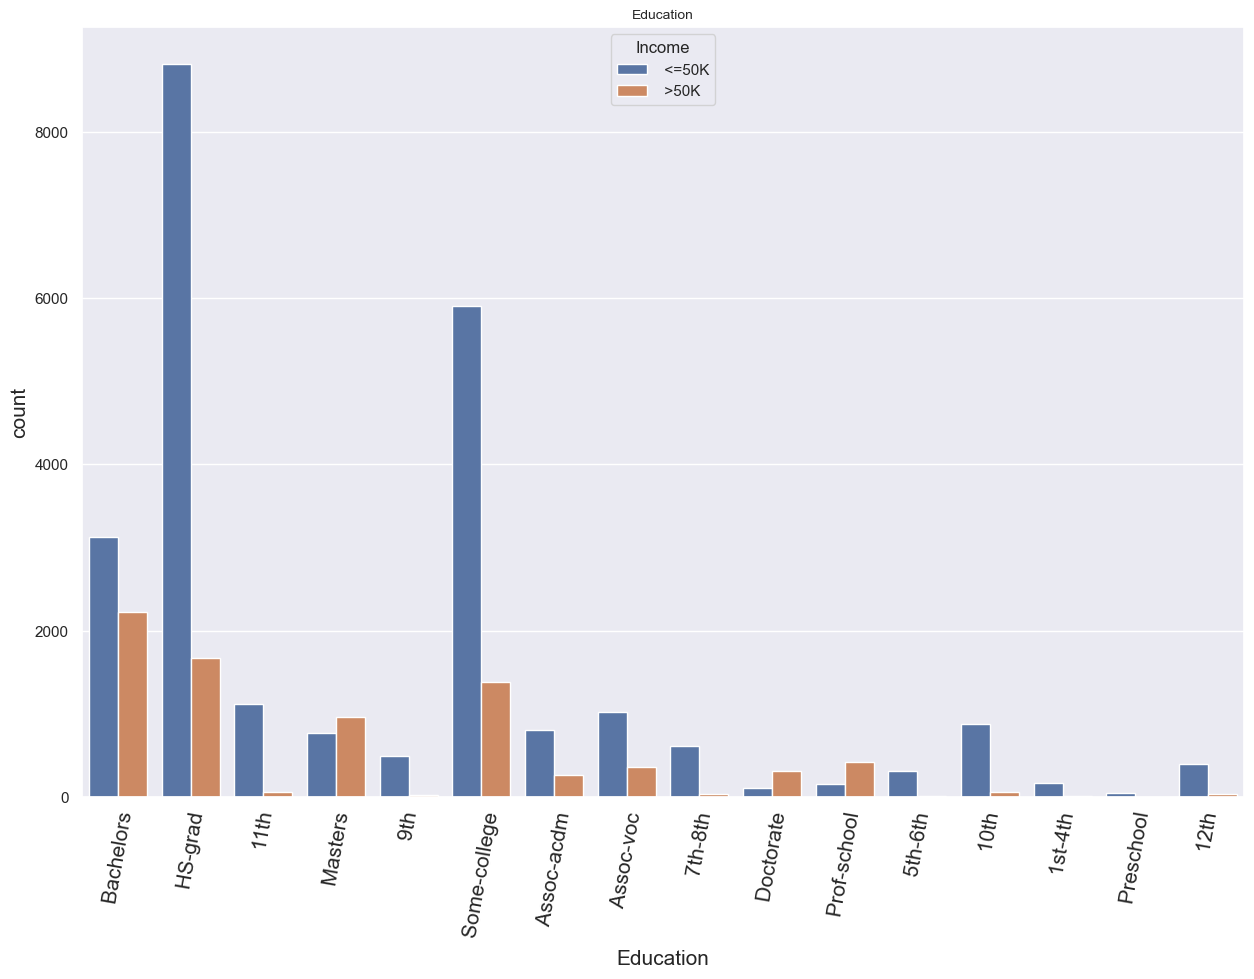

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(income['Education'], hue='Income', data=income)
plt.xlabel('Education', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('Education', fontsize=10)
plt.xticks(fontsize=15, rotation=80)
plt.show()

In [38]:
### In this graph indicate the hgher degree  have the possiblety to have income >=50K.

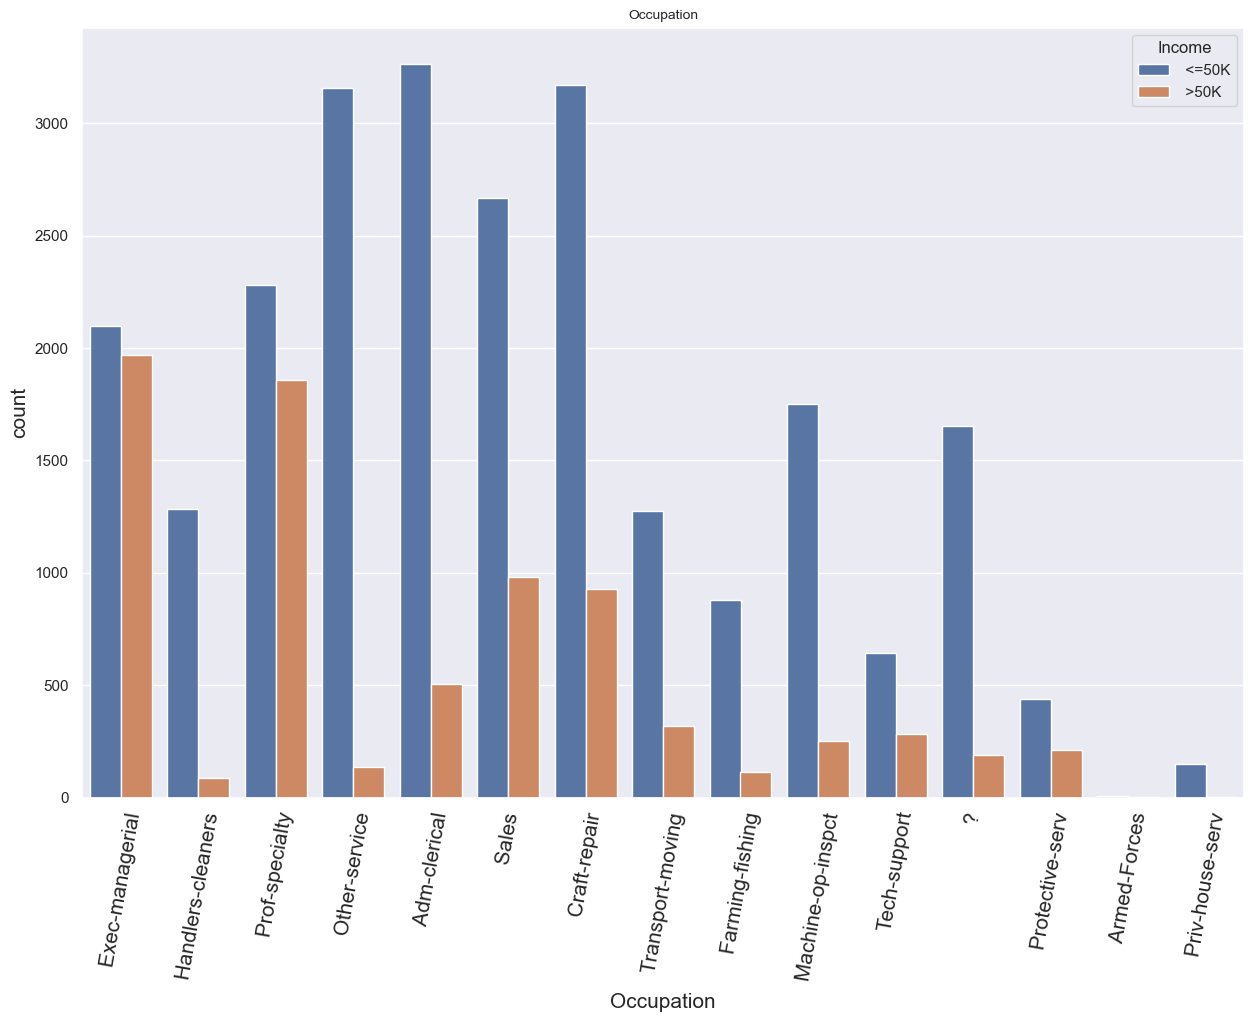

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(income['Occupation'], hue='Income', data=income)
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('Occupation', fontsize=10)
label=plt.xticks(fontsize=15, rotation=80)
plt.show()


In [40]:
##### Here graph indicate the Exec_managerial and Prof_spacility have the income >=50K
# compare the other columns that have the less the income<=50K
## so we can say that occupation positively effect the income.

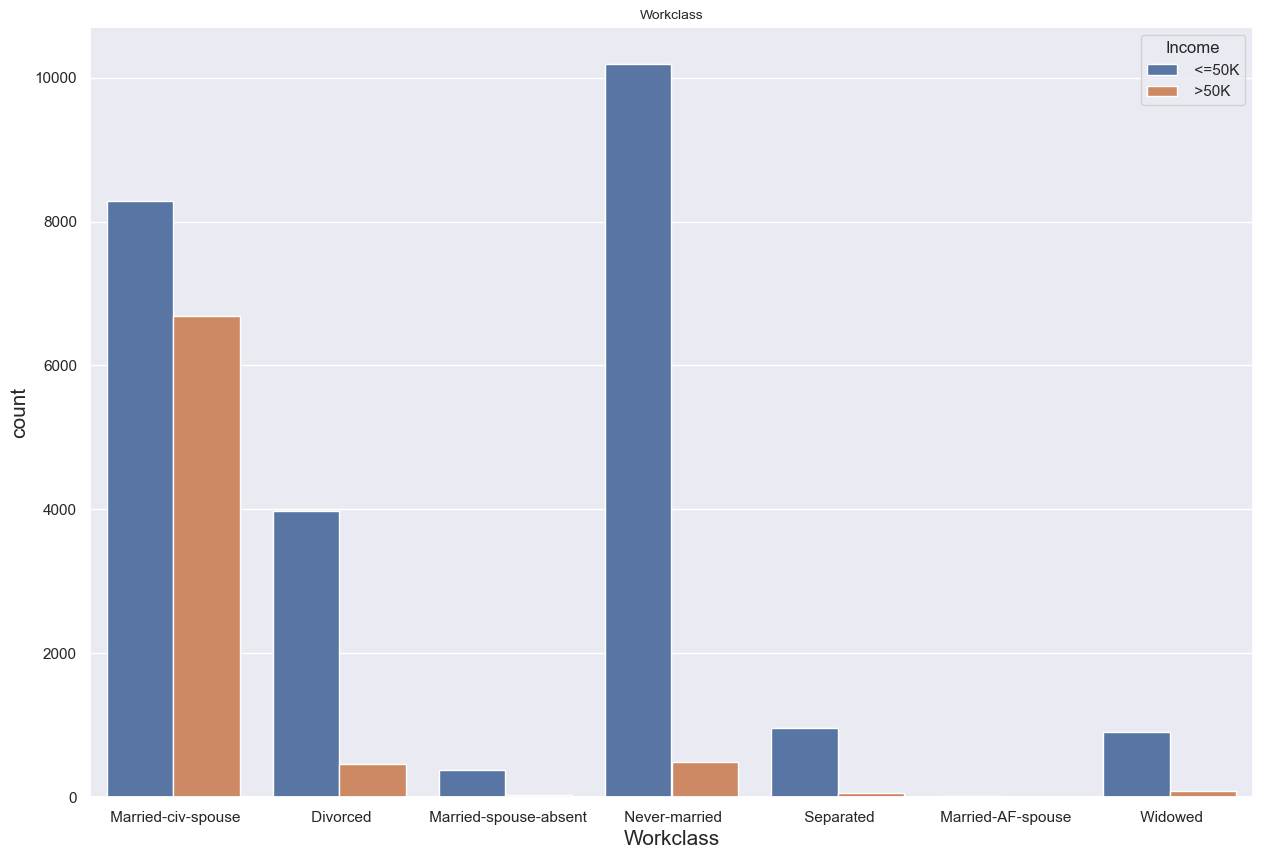

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(income['Marital_status'], hue='Income', data=income)
plt.xlabel('Workclass', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('Workclass', fontsize=10)
plt.show()

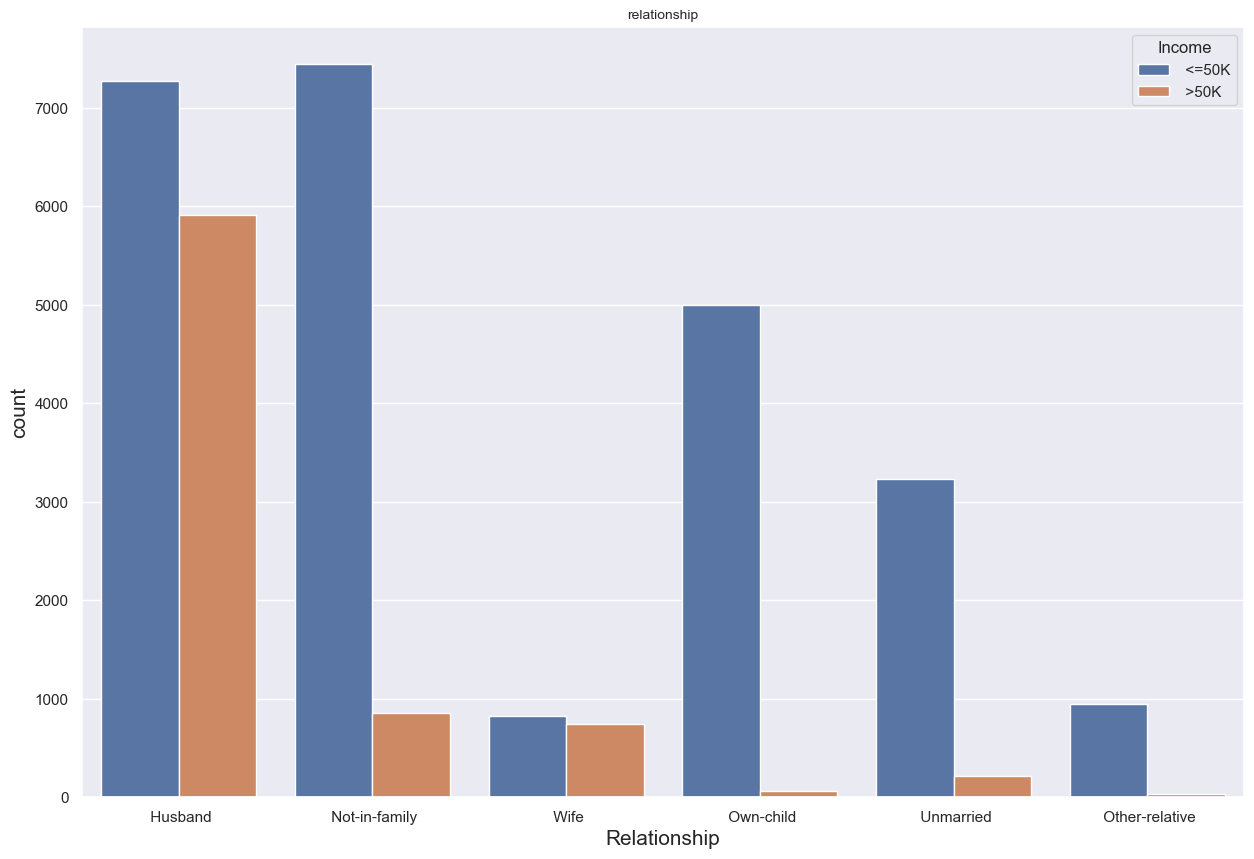

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(income['Relationship'], hue='Income', data=income)
plt.xlabel('Relationship', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('relationship', fontsize=10)
plt.show()

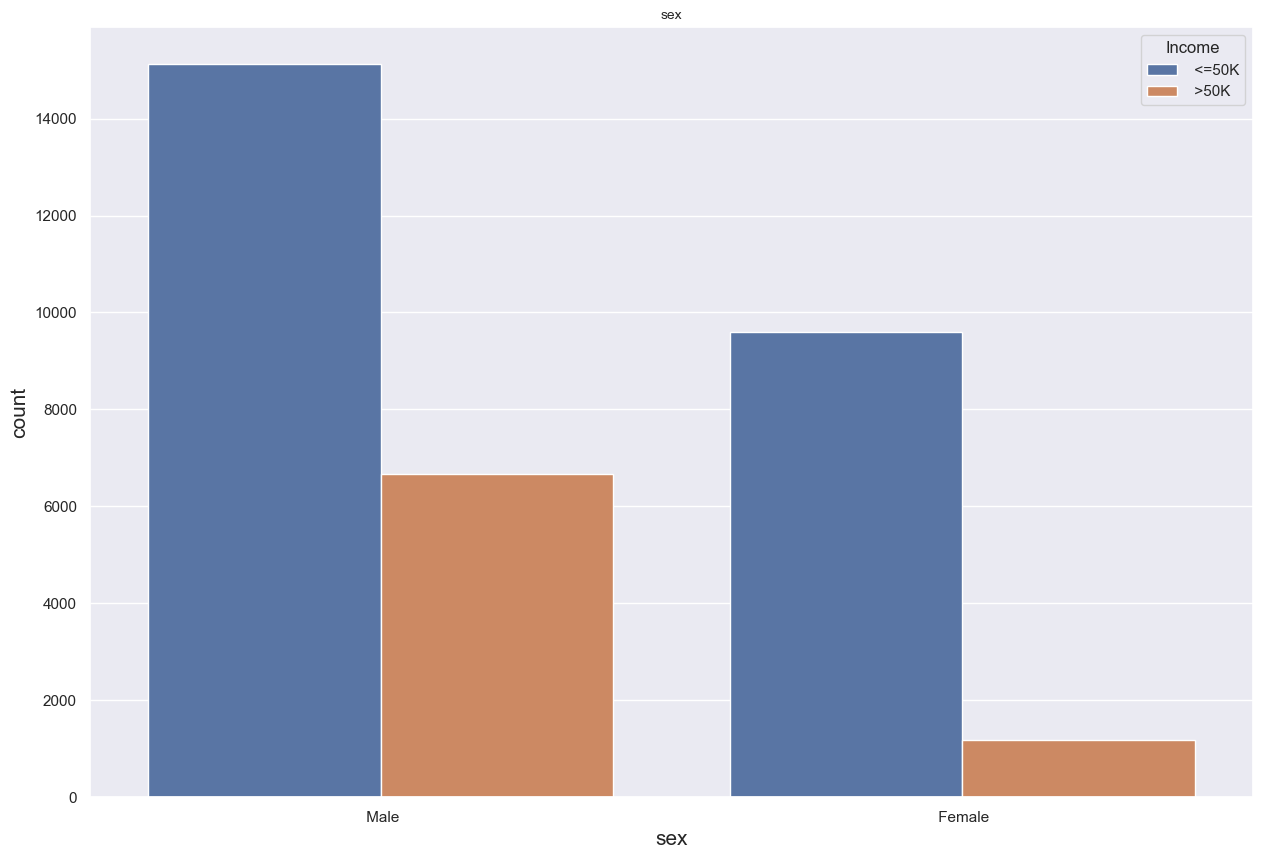

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(income['Sex'], hue='Income', data=income)
plt.xlabel('sex', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('sex', fontsize=10)
plt.show()

In [44]:
pd.crosstab(income['Income'],income['Sex'])

Sex,Female,Male
Income,,
<=50K,9592,15127
>50K,1179,6662


In [45]:
#### here we can see that Male popluation have the >=50K income compare to other Female.


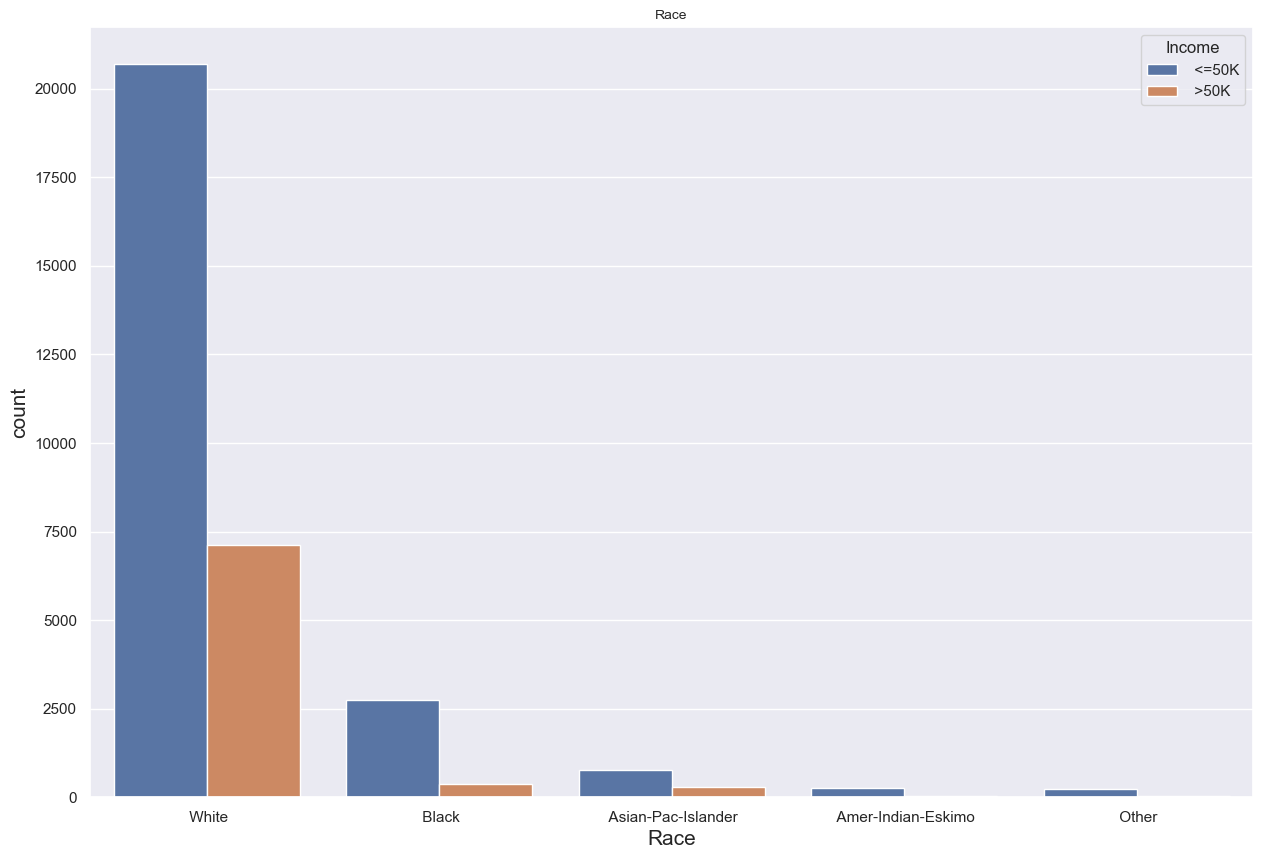

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(income['Race'], hue='Income', data=income)
plt.xlabel('Race', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('Race', fontsize=10)
plt.show()

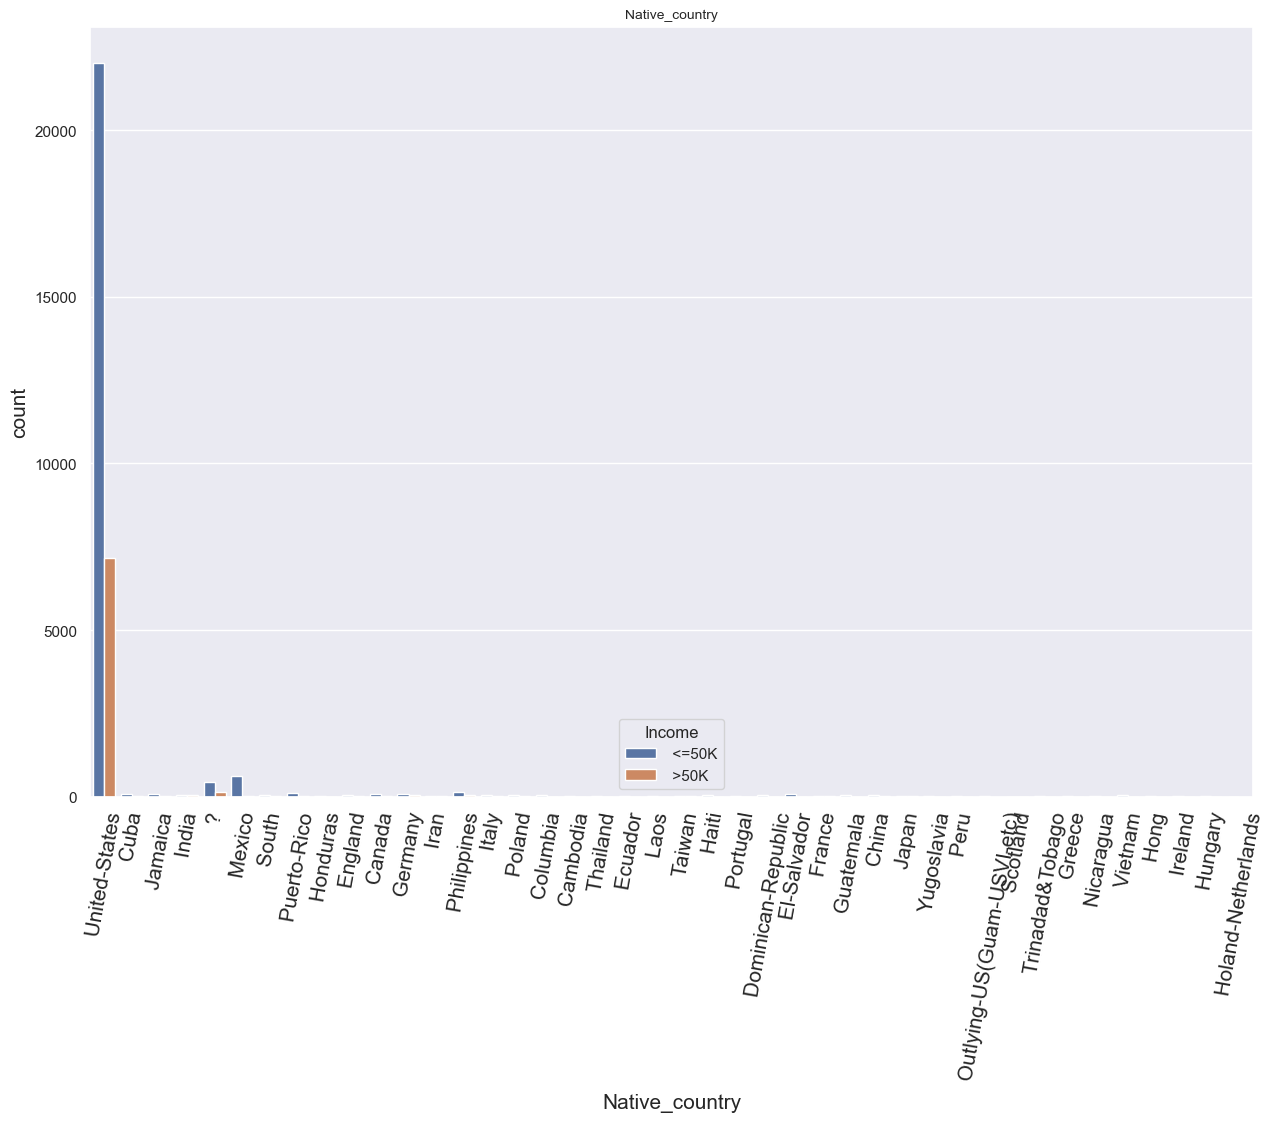

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(income['Native_country'], hue='Income', data=income)
plt.xlabel('Native_country', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('Native_country', fontsize=10)
label=plt.xticks(fontsize=15, rotation=80)
plt.show()

In [48]:
### Before starting visualization with numerical column first we fit the target column with LabelEncoder.

In [49]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
income['Income']=lb.fit_transform(income['Income'])

In [50]:
### Here we can see the most of the population working  with income <=50K.

In [51]:
## Lets visulalization with numerical columns.

<AxesSubplot:xlabel='Age', ylabel='Density'>

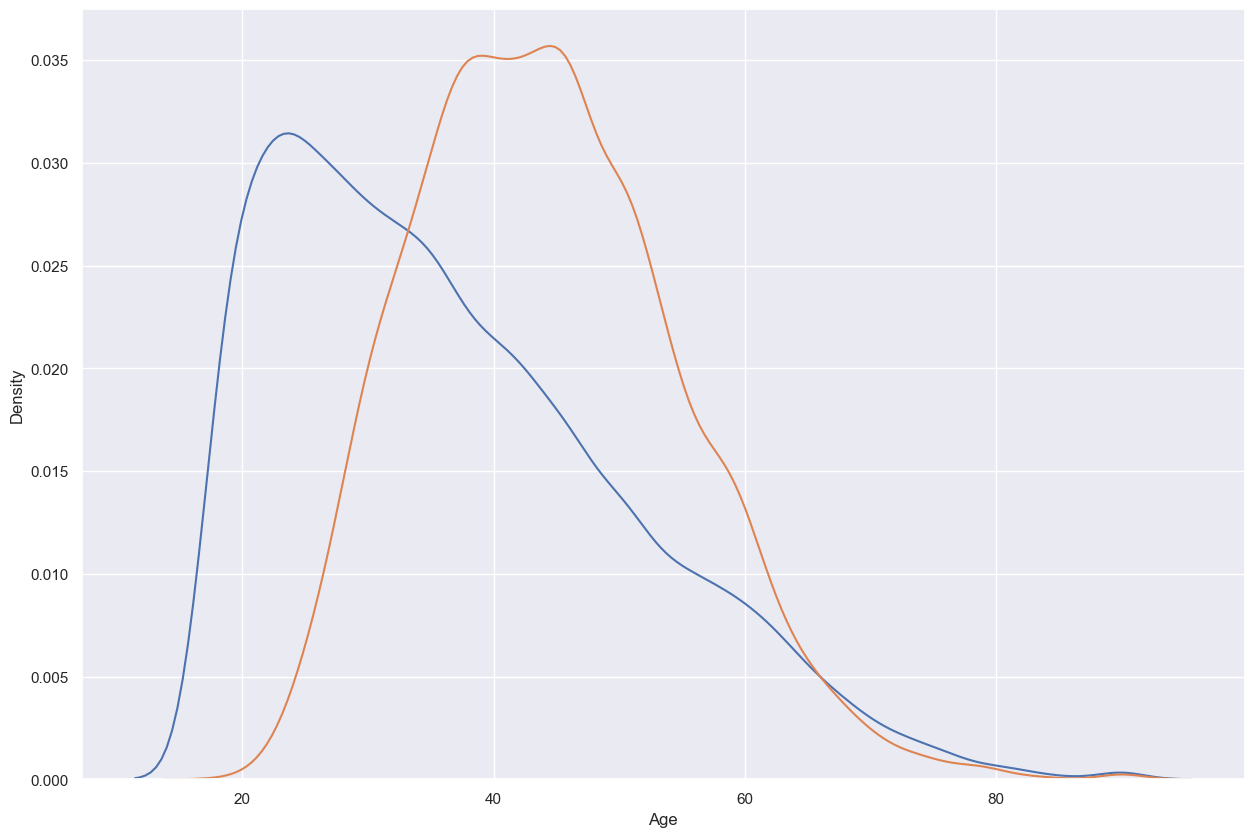

In [56]:
plt.figure(figsize=(15,10))
sns.distplot(income[income['Income']==0]['Age'], hist=False)
sns.distplot(income[income['Income']==1]['Age'], hist=False)                    


<AxesSubplot:xlabel='Education_num', ylabel='Density'>

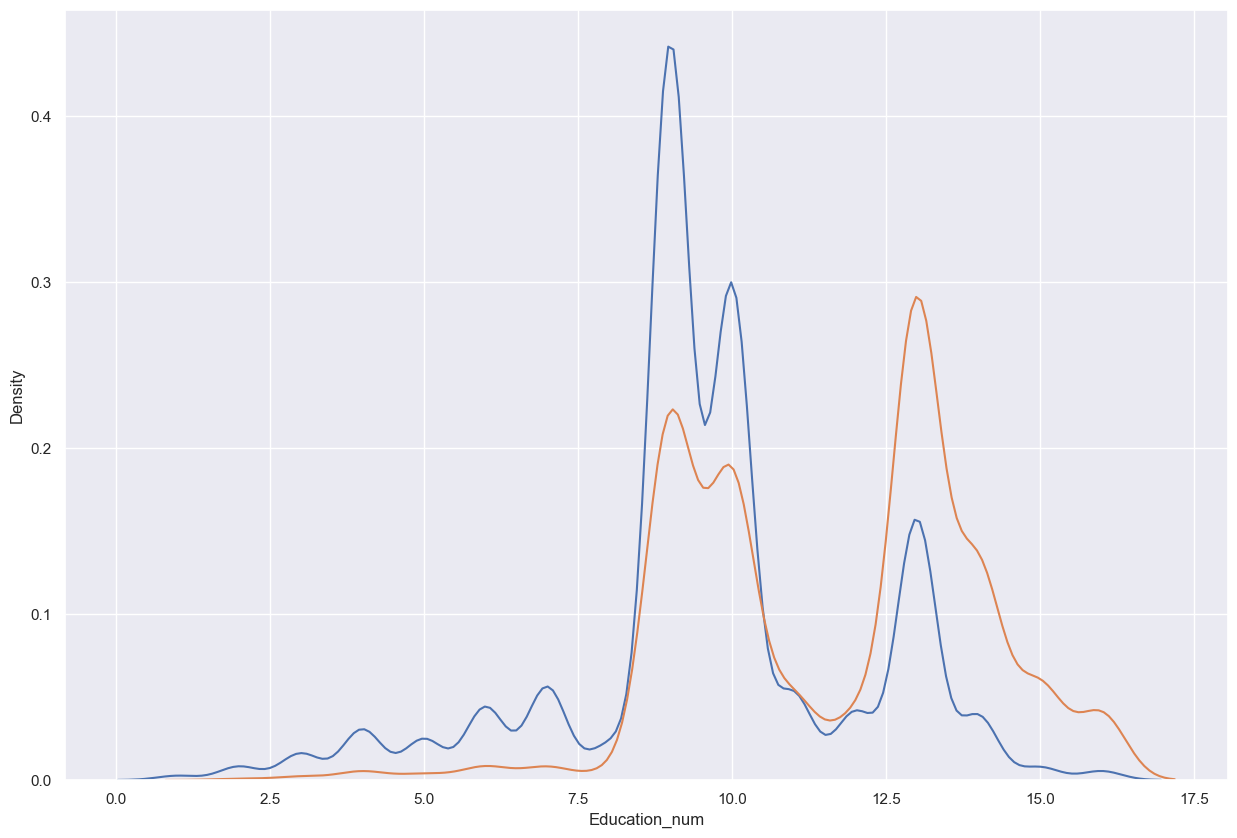

In [58]:
plt.figure(figsize=(15,10))
sns.distplot(income[income['Income']==0]['Education_num'], hist=False)
sns.distplot(income[income['Income']==1]['Education_num'], hist=False)                    


<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

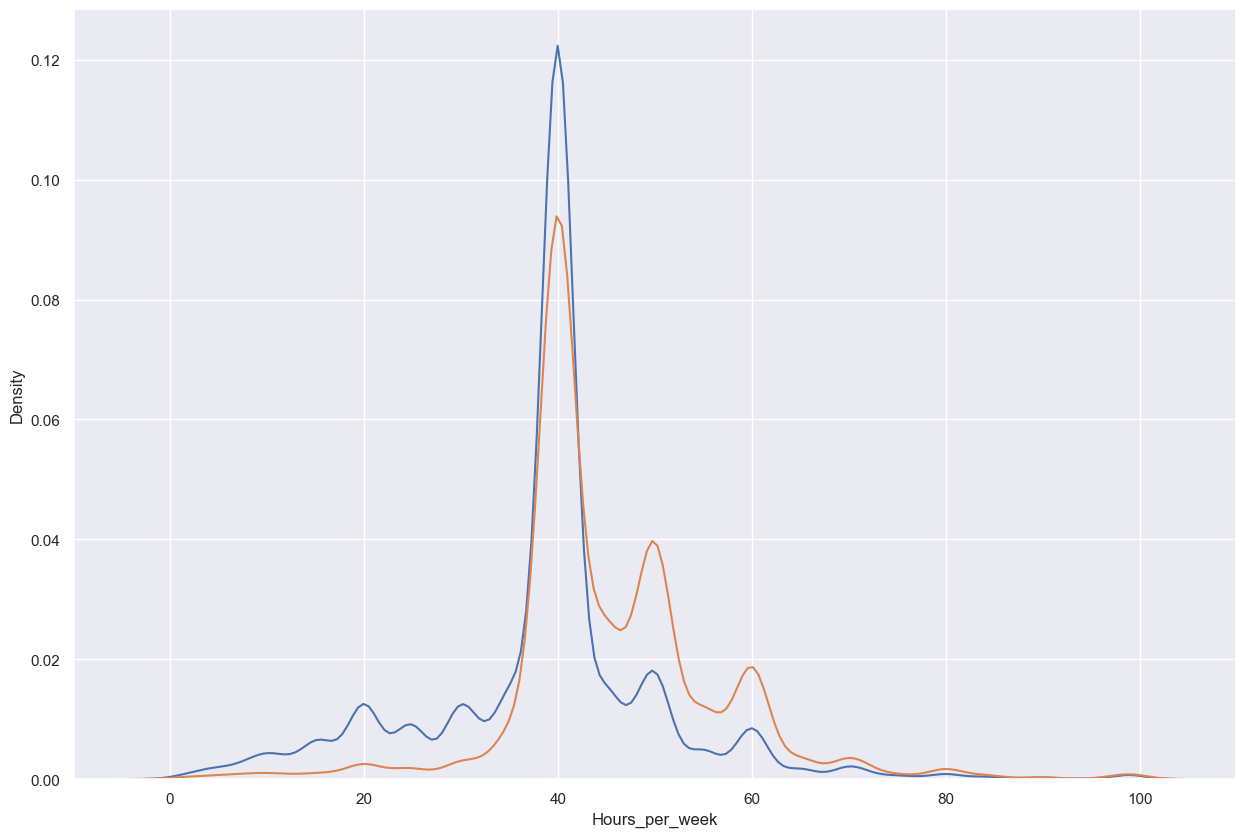

In [59]:
plt.figure(figsize=(15,10))
sns.distplot(income[income['Income']==0]['Hours_per_week'], hist=False)
sns.distplot(income[income['Income']==1]['Hours_per_week'], hist=False)                    


# Data preprocessing

In [60]:
###  let s drop the columnthat are not relevant the our model


In [63]:
income.drop(['Capital_gain', 'Capital_loss', 'Fnlwgt'], axis=True,inplace=True)

In [64]:
income

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [66]:
income.shape

(32560, 12)

In [67]:
feature=income.drop(['Income', 'Education'], axis=1)

In [68]:
target=income['Income']

In [71]:
pd.set_option('display.max_column', None)

In [72]:
new_income=pd.get_dummies(feature,sparse=False, drop_first=True)

In [73]:
new_income

,Age,Education_num,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,13,13,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,9,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,7,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,13,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,14,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,38,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,40,9,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,58,9,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,22,9,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_income['Education']=lb.fit_transform(income['Education'])

In [75]:
new_income['Income']=target

In [76]:
new_income.head()

,Age,Education_num,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Education,Income
0,50,13,13,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,0
1,38,9,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0
2,53,7,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,28,13,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0
4,37,14,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12,0


In [78]:
new_income.corr()

,Age,Education_num,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Education,Income
Age,1.000000,0.036527,0.068756,0.051227,0.060901,-0.019362,-0.198393,0.102693,0.136253,0.012763,0.013995,-0.011896,0.315684,0.016698,-0.534377,0.010210,0.265177,-0.042910,-0.010190,0.012515,0.099353,0.034210,-0.098579,-0.016257,-0.089346,0.015624,0.054171,0.003891,-0.031980,-0.019576,0.026910,-0.010108,-0.070002,-0.432919,0.043188,0.020854,-0.011111,-0.019434,-0.034415,0.033412,0.088832,-0.001403,0.017748,0.013920,0.003530,0.028501,-0.002903,-0.004170,-0.018643,0.009935,0.000840,0.003211,0.016691,-0.020041,-0.000833,-0.002674,-0.006938,-0.008963,0.015828,-0.002001,0.002231,-0.004228,0.027256,-0.010943,-0.001088,-0.006654,-0.055054,-0.011766,0.000202,-0.007522,0.004948,0.014285,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-0.015054,0.000375,-0.010508,0.234039
Education_num,0.036527,1.000000,0.148127,0.060526,0.097952,-0.015116,-0.118438,0.077366,0.016477,0.102458,-0.008136,0.000964,0.086113,-0.034219,-0.032161,-0.055147,-0.068040,0.004525,0.000197,-0.143063,0.200941,-0.101529,-0.127930,-0.158497,-0.169676,-0.071637,0.419028,0.005782,0.030266,0.060710,-0.115954,0.053374,-0.088627,-0.099200,-0.058626,0.033435,0.062099,-0.075262,-0.044130,0.051340,0.012256,-0.012127,0.013586,0.019413,-0.011721,-0.010105,-0.053519,-0.007028,-0.071996,0.019042,0.025077,0.022862,-0.004137,-0.069851,-0.016426,-0.000174,-0.010785,0.005005,0.005350,0.050687,0.032719,0.000029,-0.022687,-0.004440,0.023003,-0.013942,-0.217665,-0.017276,0.001654,-0.008709,0.023961,0.000324,-0.044286,-0.041268,0.001264,0.016048,0.049474,0.007897,-0.017070,0.101198,-0.007482,-0.001233,0.359172,0.335182
Hours_per_week,0.068756,0.148127,1.000000,0.013293,0.011576,-0.014262,-0.020930,0.127868,0.093884,-0.023204,-0.012973,0.001492,0.212818,-0.007090,-0.197941,-0.016587,-0.107123,-0.084385,0.000309,0.057375,0.139208,0.094170,-0.042265,0.006598,-0.155873,-0.041467,0.060253,0.028102,0.009889,-0.013946,0.077596,0.007500,-0.048981,-0.249255,-0.037182,-0.065141,-0.004564,-0.053

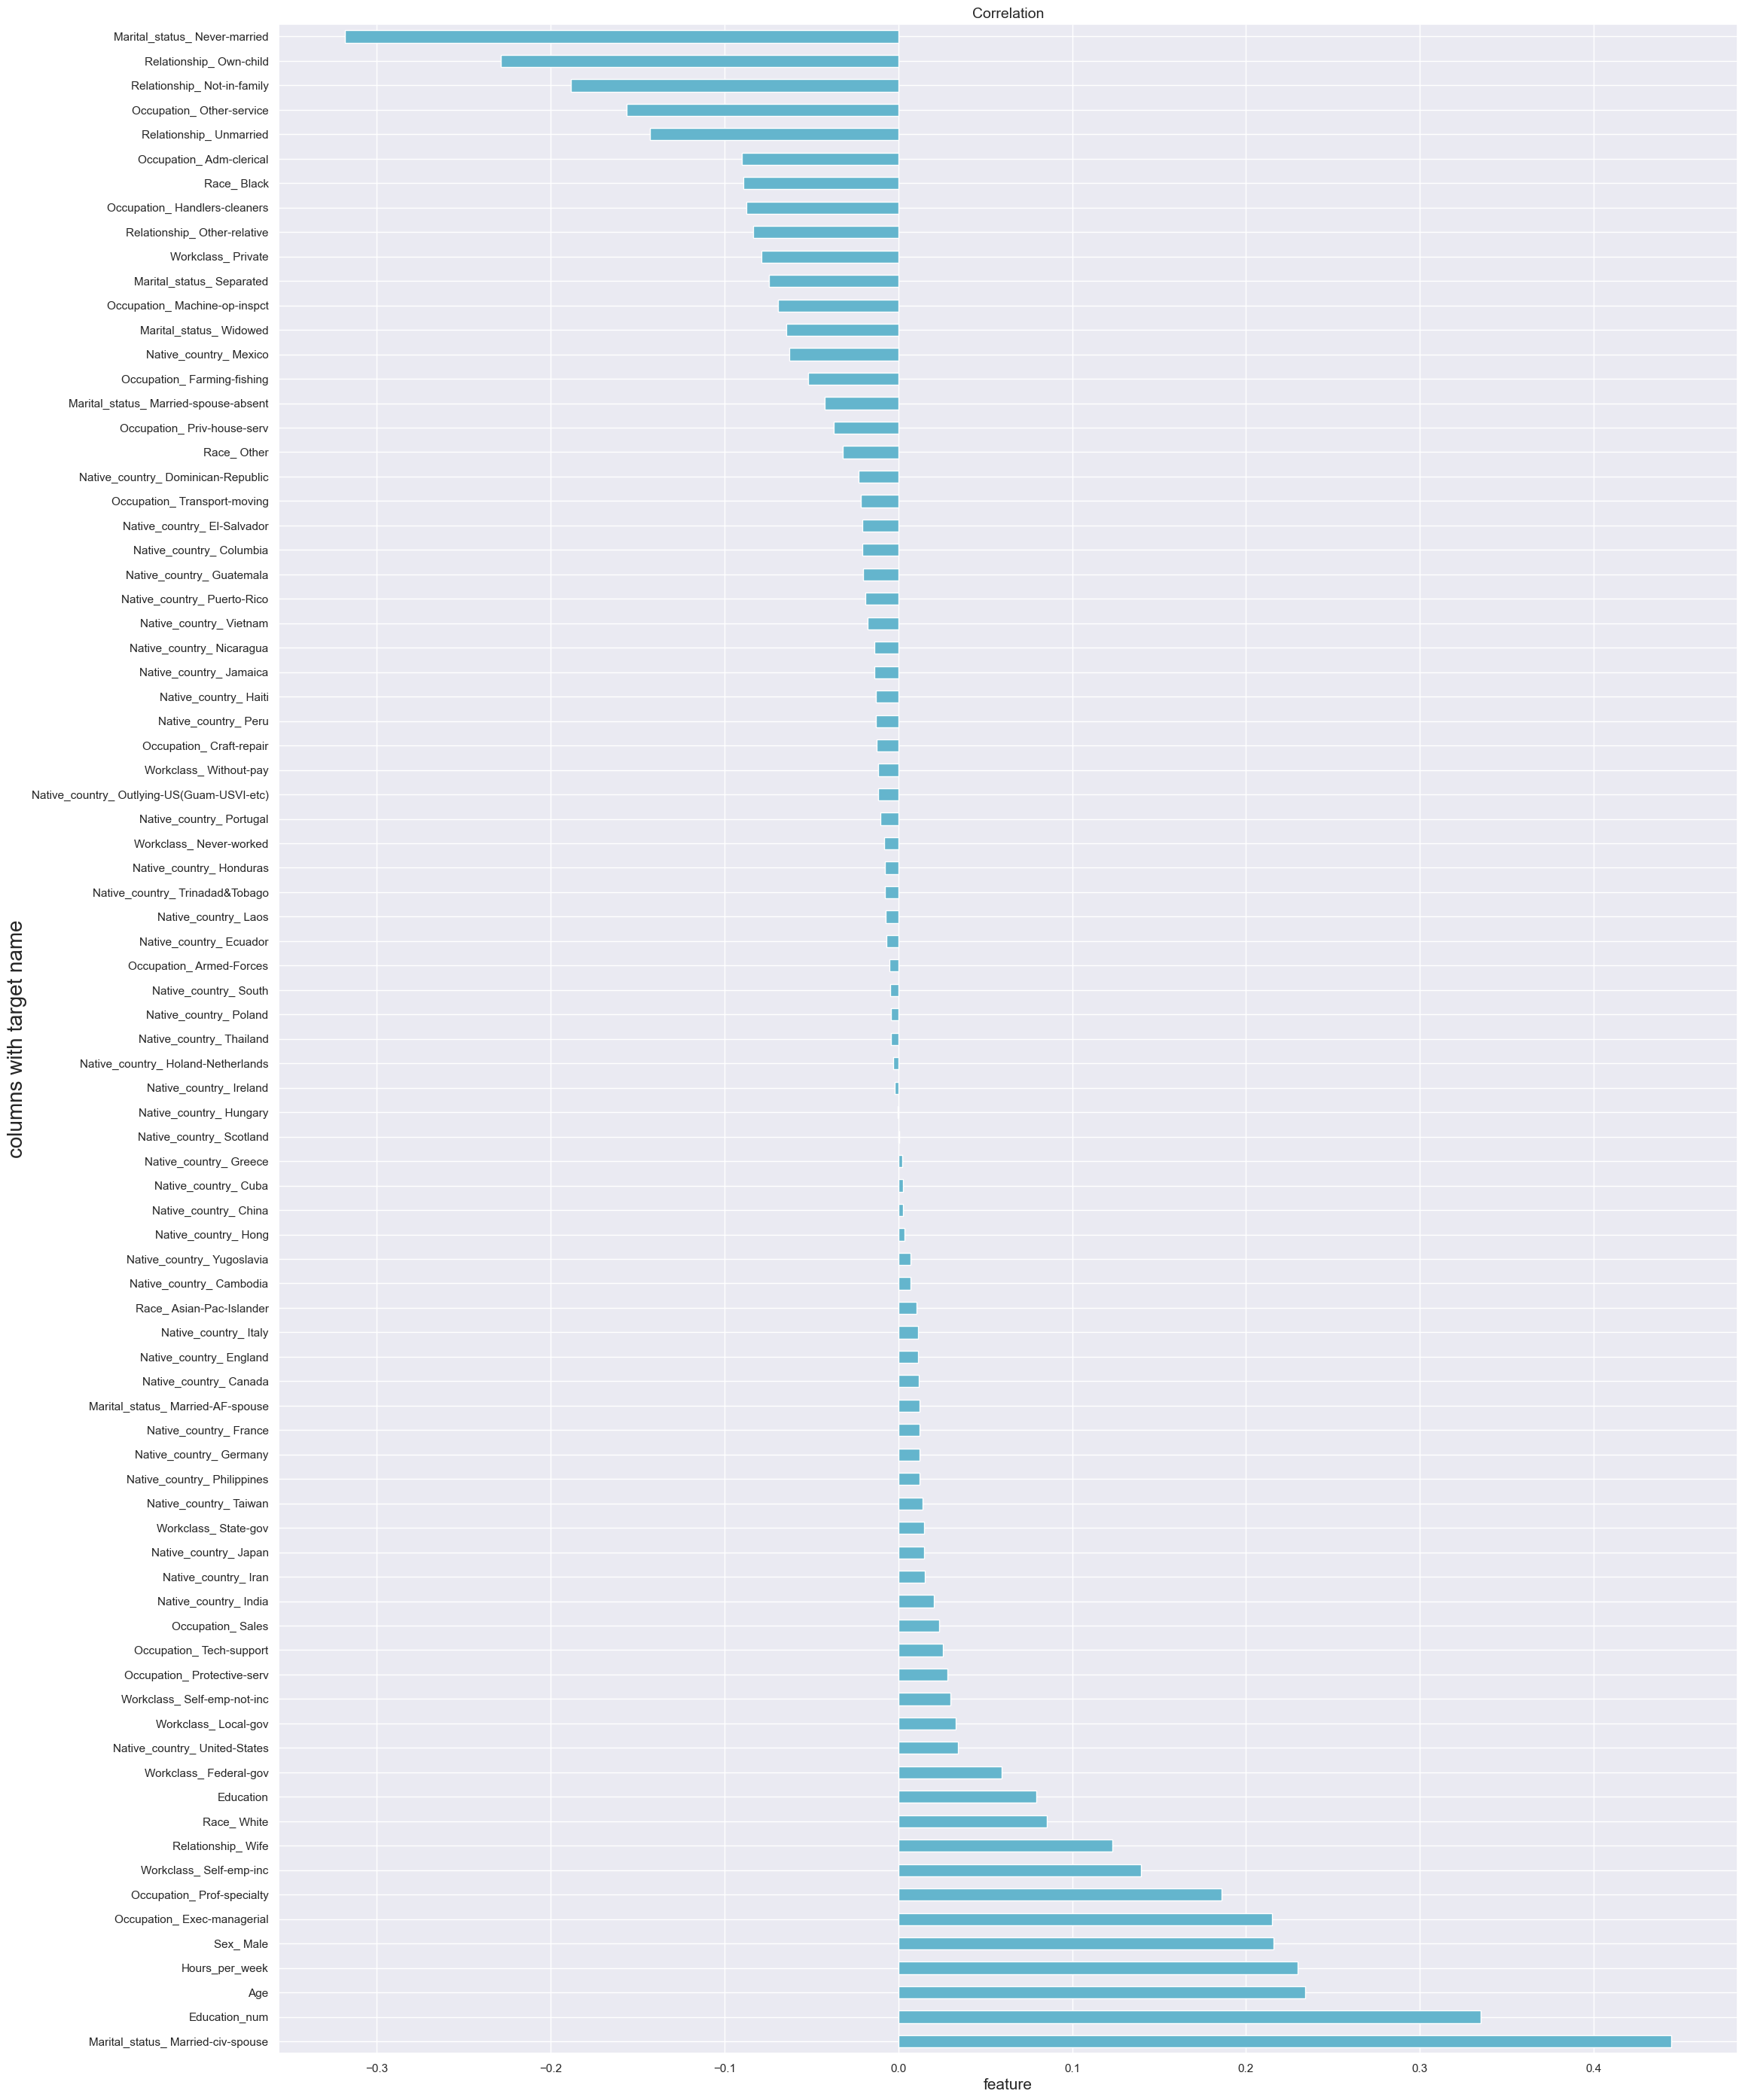

In [80]:
plt.figure(figsize=(25,35))
new_income.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='barh', color='c')
plt.xlabel('feature', fontsize=15)
plt.ylabel('columns with target name', fontsize=20)
plt.title('Correlation', fontsize=14)
plt.show()

# Checking outliers and skewness

In [81]:
### most of the columns are categorical columns so we will remove the  skewness few columns. 

In [82]:
pd.set_option('display.max_row', None)

In [83]:
new_income.skew()

Age                                             0.558738
Education_num                                  -0.311630
Hours_per_week                                  0.227636
Workclass_ Federal-gov                          5.563263
Workclass_ Local-gov                            3.553376
Workclass_ Never-worked                        68.182528
Workclass_ Private                             -0.857656
Workclass_ Self-emp-inc                         5.119915
Workclass_ Self-emp-not-inc                     3.146333
Workclass_ State-gov                            4.706125
Workclass_ Without-pay                         48.196771
Marital_status_ Married-AF-spouse              37.587006
Marital_status_ Married-civ-spouse              0.160720
Marital_status_ Married-spouse-absent           8.655325
Marital_status_ Never-married                   0.732408
Marital_status_ Separated                       5.366657
Marital_status_ Widowed                         5.461111
Occupation_ Adm-clerical       

In [84]:
##$ Age, Education_num, Hour per week are not having the skewness so we can proceed.

# Scaling the data Using the  StandaredScaler. 

In [86]:
#### Dividing data into  feature and target data.
x= new_income.drop(['Income'], axis=1)
y=new_income['Income']


In [87]:
from sklearn.preprocessing import StandardScaler

In [89]:
sdc=StandardScaler()
x=sdc.fit_transform(x)

<AxesSubplot:xlabel='Income', ylabel='count'>

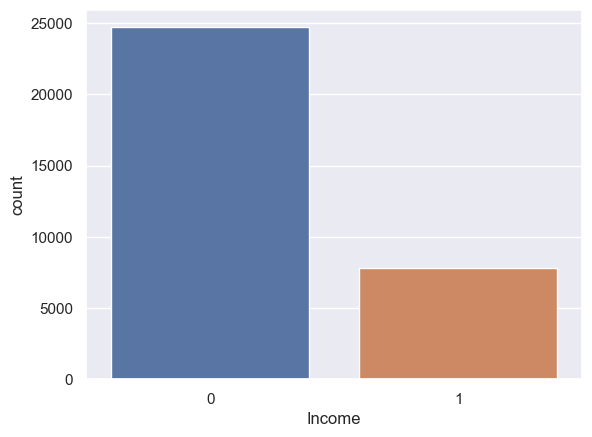

In [90]:
sns.countplot(y)

In [92]:
from imblearn.over_sampling import SMOTE

In [94]:
X_train_over, Y_train_over=SMOTE(k_neighbors=3).fit_resample(x,y)

In [95]:
X_train_over.shape

(49438, 83)

In [96]:
Y_train_over.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [97]:
new_income.columns

Index(['Age', 'Education_num', 'Hours_per_week', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov', 'Workclass_ Never-worked', 'Workclass_ Private',
       'Workclass_ Self-emp-inc', 'Workclass_ Self-emp-not-inc',
       'Workclass_ State-gov', 'Workclass_ Without-pay',
       'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marital_status_ Widowed', 'Occupation_ Adm-clerical',
       'Occupation_ Armed-Forces', 'Occupation_ Craft-repair',
       'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing',
       'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct',
       'Occupation_ Other-service', 'Occupation_ Priv-house-serv',
       'Occupation_ Prof-specialty', 'Occupation_ Protective-serv',
       'Occupation_ Sales', 'Occupation_ Tech-support',
       'Occupation_ Transport-moving', 'Relationship_ Not-i

In [99]:
dfx=pd.DataFrame(data=X_train_over,columns=['Age','Education_num', 'Hours_per_week', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov', 'Workclass_ Never-worked', 'Workclass_ Private',
       'Workclass_ Self-emp-inc', 'Workclass_ Self-emp-not-inc',
       'Workclass_ State-gov', 'Workclass_ Without-pay',
       'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marital_status_ Widowed', 'Occupation_ Adm-clerical',
       'Occupation_ Armed-Forces', 'Occupation_ Craft-repair',
       'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing',
       'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct',
       'Occupation_ Other-service', 'Occupation_ Priv-house-serv',
       'Occupation_ Prof-specialty', 'Occupation_ Protective-serv',
       'Occupation_ Sales', 'Occupation_ Tech-support',
       'Occupation_ Transport-moving', 'Relationship_ Not-in-family',
       'Relationship_ Other-relative', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Race_ Asian-Pac-Islander', 'Race_ Black', 'Race_ Other', 'Race_ White',
       'Sex_ Male', 'Native_country_ Cambodia', 'Native_country_ Canada',
       'Native_country_ China', 'Native_country_ Columbia',
       'Native_country_ Cuba', 'Native_country_ Dominican-Republic',
       'Native_country_ Ecuador', 'Native_country_ El-Salvador',
       'Native_country_ England', 
       'Native_country_ Germany', 'Native_country_ Greece',
       'Native_country_ Guatemala', 'Native_country_ Haiti',
       'Native_country_ Holand-Netherlands', 'Native_country_ Honduras',
       'Native_country_ Hong', 'Native_country_ Hungary',
       'Native_country_ India', 'Native_country_ Iran',
       'Native_country_ Ireland', 'Native_country_ Italy',
       'Native_country_ Jamaica', 'Native_country_ Japan',
       'Native_country_ Laos', 'Native_country_ Mexico',
       'Native_country_ Nicaragua',
       'Native_country_ Outlying-US(Guam-USVI-etc)', 'Native_country_ Peru',
       'Native_country_ Philippines', 'Native_country_ Poland',
       'Native_country_ Portugal', 'Native_country_ Puerto-Rico',
       'Native_country_ Scotland', 'Native_country_ South',
       'Native_country_ Taiwan', 'Native_country_ Thailand',
       'Native_country_ Trinadad&Tobago', 'Native_country_ United-States',
       'Native_country_ Vietnam', 'Native_country_ Yugoslavia', 'Education',
       'Income'])

# VIF Calculation

In [101]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF Factor']= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)
                       

In [103]:
calc_vif(dfx)

,variables,VIF Factor
0,Age,1.633090
1,Education_num,1.893460
2,Hours_per_week,1.276675
3,Workclass_ Federal-gov,inf
4,Workclass_ Local-gov,inf
5,Workclass_ Never-worked,1.004174
6,Workclass_ Private,inf
7,Workclass_ Self-emp-inc,inf
8,Workclass_ Self-emp-not-inc,inf
9,Workclass_ State-gov,inf


In [111]:
x=dfx
y=Y_train_over

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [119]:
lr=LogisticRegression()

x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=0, test_size=0.20)
lr.fit(x_train, y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
                         

In [120]:

       print('At Random State')
       print("traning accuracy score is ",accuracy_score(y_train, pred_train)*100)
       print("testing accuracy score is ", accuracy_score(y_test, pred_test)*100)
                                     

At Random State
traning accuracy score is  81.47661188369153
testing accuracy score is  81.64441747572816
